In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import mydef

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing Data

## Import Data & Convert CSV to Parquet

In [41]:
mydef.convert_file( 
    path_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_harian.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet',
    format_target='parquet',
    save_index=False
)

mydef.convert_file(
    path_input= r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet',
    format_target='parquet',
    save_index=False
)

mydef.convert_file(
    path_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet',
    format_target='parquet',
    save_index=False
)

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_harian.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet...
File berhasil disimpan sebagai Parquet.

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet...
File berhasil disimpan sebagai Parquet.

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet...
File berhasil disimpan sebagai Parquet.



True

## Merapikan Data

### Menghapus Kolom yang tidak digunakan (data_1)

In [18]:
## Menghapus Kolom yang tidak diperlukan dari DataFrame
# Membuat variabel baru untuk proses selanjutnya (cleaning)
df_jam_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet')
df_hari_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet')

# Daaftar kolom yang akan dihapus
hapus_kolom_jam = ['id','tegangan', 'fasa1', 'fasa2', 'fasa3', 'A', 'A1', 'A2', 'A3', 'PF', 'F', 'quality']
hapus_kolom_hari = ['id','tegangan','fasa1','fasa2','fasa3','PF','F','totwbpday','totkwhday']

# Pemanggilan fungsi untuk menghapus kolom
removed_jam = mydef.remove_column(df_jam_1, hapus_kolom_jam) 
removed_hari = mydef.remove_column(df_hari_1, hapus_kolom_hari)

# Menyimpan DataFrame yang sudah dihapus kolomnya ke file Parquet dan csv
removed_jam.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet', engine='pyarrow')
removed_hari.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet', engine='pyarrow')
removed_jam.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_1.csv', index=False)
removed_hari.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_1.csv', index=False)


--- Memulai Proses Penghapusan Kolom untuk: DataFrame ---
Bentuk DataFrame SEBELUM penghapusan kolom: (1966425, 17)
Kolom yang akan dihapus: ['id', 'tegangan', 'fasa1', 'fasa2', 'fasa3', 'A', 'A1', 'A2', 'A3', 'PF', 'F', 'quality']
Kolom berhasil dihapus.
Bentuk DataFrame SETELAH penghapusan kolom: (1966425, 5)
Kolom yang tersisa (5 kolom): ['timestamp', 'fakultas', 'gedung', 'meter_id', 'power']
--- Proses Penghapusan Kolom untuk DataFrame Selesai dengan Sukses ---


--- Memulai Proses Penghapusan Kolom untuk: DataFrame ---
Bentuk DataFrame SEBELUM penghapusan kolom: (82511, 14)
Kolom yang akan dihapus: ['id', 'tegangan', 'fasa1', 'fasa2', 'fasa3', 'PF', 'F', 'totwbpday', 'totkwhday']
Kolom berhasil dihapus.
Bentuk DataFrame SETELAH penghapusan kolom: (82511, 5)
Kolom yang tersisa (5 kolom): ['timestamp', 'fakultas', 'gedung', 'meter_id', 'power']
--- Proses Penghapusan Kolom untuk DataFrame Selesai dengan Sukses ---



### Menghapus meter_id yang tidak digunakan (data_2)

In [19]:
## Menghapus meter_id yang tidak digunakan (data_2)

# 1. Membaca file Parquet
# Pastikan path file ini sudah benar sesuai dengan lokasi di komputer Anda
path_df_hari_input = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet'
path_df_jam_input = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet'

try:
    df_hari_2 = pd.read_parquet(path_df_hari_input)
    df_jam_2 = pd.read_parquet(path_df_jam_input)
except FileNotFoundError:
    print(f"Error: Salah satu atau kedua file input tidak ditemukan. Periksa path berikut:")
    print(f"- {path_df_hari_input}")
    print(f"- {path_df_jam_input}")
    exit()

# 2. Daftar meter_id yang ingin dihapus
meter_ids_to_remove = [
    # Jatinangor
    241001,242001,243001,243002,244002,244001,235001,236001,237001,238001,239001,240001,
    
    # BSC-B selain total
    114002,114003,114004,114005,
    
    # Labtek V SDP (selain MDP)
    105105,105104,105103,105102,105101,
    
    # Labtek VI selain total
    2,3,1,4,6,
    
    # Labtek VII selain total
    107104,107103,107102,107101,
    
    # Labtek VIII selain total
    108112,108111,108113,108114,108110,
    
    # CADL selain total
    # 122141,122131,122121,122111, # tidak jadi karena CAD dan CADL adalah beda gedung. CAD yang di depan CADL yang di belakang
    
    # CRCS selain SDP
    112017,112031,112011,112012,112013,112014,112015,112016,112026,112027,112032,112033,112041,112121,
    
    # CAS selain SDP
    111026, 111040, 111033, 111032, 111031, 111030, 111041, 111025, 111024, 111023, 111022, 111021, 111016, 111042, 111043, 111015, 111014, 111013, 111012, 111011,
    
    # Tidak ada di tabel meter_id
    103, 2026,
    
    # gardu CADL (asumsi pakai A dan B)
    148001

]
# Mengubah list menjadi set untuk operasi yang lebih efisien
meter_ids_to_remove_set = set(meter_ids_to_remove)

# --- KODE UNTUK MENGHITUNG JUMLAH METER ID YANG TERHAPUS SECARA TERPISAH ---
# Mendapatkan meter_id unik dari DataFrame asli SEBELUM proses penghapusan
original_meter_ids_in_df_hari = set(df_hari_2['meter_id'].unique())
original_meter_ids_in_df_jam = set(df_jam_2['meter_id'].unique())

# Meter ID yang ada di daftar penghapusan DAN juga ada di df_hari_2
ids_effectively_removed_from_hari = original_meter_ids_in_df_hari.intersection(meter_ids_to_remove_set)
jumlah_meter_id_unik_terhapus_dari_hari = len(ids_effectively_removed_from_hari)

# Meter ID yang ada di daftar penghapusan DAN juga ada di df_jam_2
ids_effectively_removed_from_jam = original_meter_ids_in_df_jam.intersection(meter_ids_to_remove_set)
jumlah_meter_id_unik_terhapus_dari_jam = len(ids_effectively_removed_from_jam)

print(f"Jumlah meter_id unik yang dihapus dari data harian: {jumlah_meter_id_unik_terhapus_dari_hari}")
print(f"Meter ID yang dihapus dari data harian: {sorted(list(ids_effectively_removed_from_hari)) if jumlah_meter_id_unik_terhapus_dari_hari > 0 else 'Tidak ada'}")

print(f"\nJumlah meter_id unik yang dihapus dari data per jam: {jumlah_meter_id_unik_terhapus_dari_jam}")
print(f"Meter ID yang dihapus dari data per jam: {sorted(list(ids_effectively_removed_from_jam)) if jumlah_meter_id_unik_terhapus_dari_jam > 0 else 'Tidak ada'}")


# Opsional: Informasi tambahan jika ada meter_id di daftar hapus yang tidak ditemukan di data
# Menggabungkan semua meter_id unik yang secara efektif dihapus (dari salah satu atau kedua DataFrame)
all_unique_meter_ids_actually_removed = ids_effectively_removed_from_hari.union(ids_effectively_removed_from_jam)
total_unique_meter_ids_removed_overall = len(all_unique_meter_ids_actually_removed)
print(f"\nTotal meter_id unik yang dihapus dari keseluruhan data (harian atau jam): {total_unique_meter_ids_removed_overall}")

meter_ids_in_list_not_found_in_data = meter_ids_to_remove_set - all_unique_meter_ids_actually_removed
if meter_ids_in_list_not_found_in_data:
    print(f"\nCatatan: {len(meter_ids_in_list_not_found_in_data)} meter_id dari daftar 'meter_ids_to_remove' tidak ditemukan di kedua DataFrame:")
    print(f"  {sorted(list(meter_ids_in_list_not_found_in_data))}")
    

# 3. Menghapus baris yang memiliki meter_id tersebut
# Variabel df_hari_2 dan df_jam_2 akan di-overwrite dengan DataFrame yang sudah difilter
df_hari_2 = df_hari_2[~df_hari_2['meter_id'].isin(meter_ids_to_remove)]
df_jam_2 = df_jam_2[~df_jam_2['meter_id'].isin(meter_ids_to_remove)]

# 4. Menyimpan hasilnya ke file baru
# Pastikan path file output ini sudah benar dan Anda memiliki izin untuk menulis ke folder tersebut
path_df_hari_output_parquet = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet'
path_df_jam_output_parquet = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet'
path_df_hari_output_csv = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_2.csv'
path_df_jam_output_csv = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_2.csv'

try:
    df_hari_2.to_parquet(path_df_hari_output_parquet)
    df_jam_2.to_parquet(path_df_jam_output_parquet)

    df_hari_2.to_csv(path_df_hari_output_csv, index=False)
    df_jam_2.to_csv(path_df_jam_output_csv, index=False)

    print(f"\nFile berhasil diproses dan disimpan.")
    print(f"Output Parquet Harian: {path_df_hari_output_parquet}")
    print(f"Output Parquet Jam: {path_df_jam_output_parquet}")
    print(f"Output CSV Harian: {path_df_hari_output_csv}")
    print(f"Output CSV Jam: {path_df_jam_output_csv}")
except Exception as e:
    print(f"\nTerjadi error saat menyimpan file: {e}")



Jumlah meter_id unik yang dihapus dari data harian: 72
Meter ID yang dihapus dari data harian: [1, 2, 3, 4, 6, 103, 2026, 105101, 105102, 105103, 105104, 105105, 107101, 107102, 107103, 107104, 108110, 108111, 108112, 108113, 108114, 111011, 111012, 111013, 111014, 111015, 111016, 111021, 111022, 111023, 111024, 111025, 111026, 111030, 111031, 111032, 111033, 111040, 111041, 111042, 111043, 112011, 112012, 112013, 112014, 112015, 112016, 112017, 112026, 112027, 112031, 112032, 112033, 112041, 112121, 114002, 114003, 114004, 114005, 148001, 235001, 236001, 237001, 238001, 239001, 240001, 241001, 242001, 243001, 243002, 244001, 244002]

Jumlah meter_id unik yang dihapus dari data per jam: 72
Meter ID yang dihapus dari data per jam: [1, 2, 3, 4, 6, 103, 2026, 105101, 105102, 105103, 105104, 105105, 107101, 107102, 107103, 107104, 108110, 108111, 108112, 108113, 108114, 111011, 111012, 111013, 111014, 111015, 111016, 111021, 111022, 111023, 111024, 111025, 111026, 111030, 111031, 111032, 1

In [20]:
# Menghitung jumlah nilai kosong (NaN) di kolom 'power'
df_hari_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
df_jam_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')
jumlah_kosong_hari = df_hari_2['power'].isna().sum()
jumlah_kosong_jam = df_jam_2['power'].isna().sum()

print(f"Jumlah data kosong di kolom 'power' hari: {jumlah_kosong_hari}")
print(f"Jumlah data kosong di kolom 'power' jam: {jumlah_kosong_jam}")

print('dihasilkan: power yang kosong otomatis tidak ada karena tidak ter-record. (data kosong itu terlewat timestampnya)')

Jumlah data kosong di kolom 'power' hari: 0
Jumlah data kosong di kolom 'power' jam: 0
dihasilkan: power yang kosong otomatis tidak ada karena tidak ter-record. (data kosong itu terlewat timestampnya)


### Membuat pivot table (data_3)

In [21]:
# Pivot table data_hari
data_hari_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
data_hari_to_pivot['timestamp'] = pd.to_datetime(data_hari_to_pivot['timestamp'])
data_hari_3 = data_hari_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')

# Pivot table data_jam
data_jam_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')
data_jam_to_pivot['timestamp'] = pd.to_datetime(data_jam_to_pivot['timestamp'])
data_jam_3 = data_jam_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')

# save file
data_hari_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')
data_hari_3.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_3.csv')
data_jam_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
data_jam_3.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_3.csv')

### Membuat tabel dan visualisasi missing data dari meter_id


--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
   meter_id  jumlah_missing    fakultas          gedung             lokasi           ip  modbus_slave  include  power_meter  persentase_missing
43   117112             846         SBM        SBM Lama              Total  10.18.65.30           112        1         2200           77.828887
9    101201             808       FMIPA        LABTEK I  Lab Kimia Organik   10.1.22.67           100        1         5350           74.333027
78   500002             770  UNIT KERJA     Villa Merah              Total   10.8.62.16             1        0         2200           70.837167
77   500001             764        PLTS     Villa Merah               PLTS  

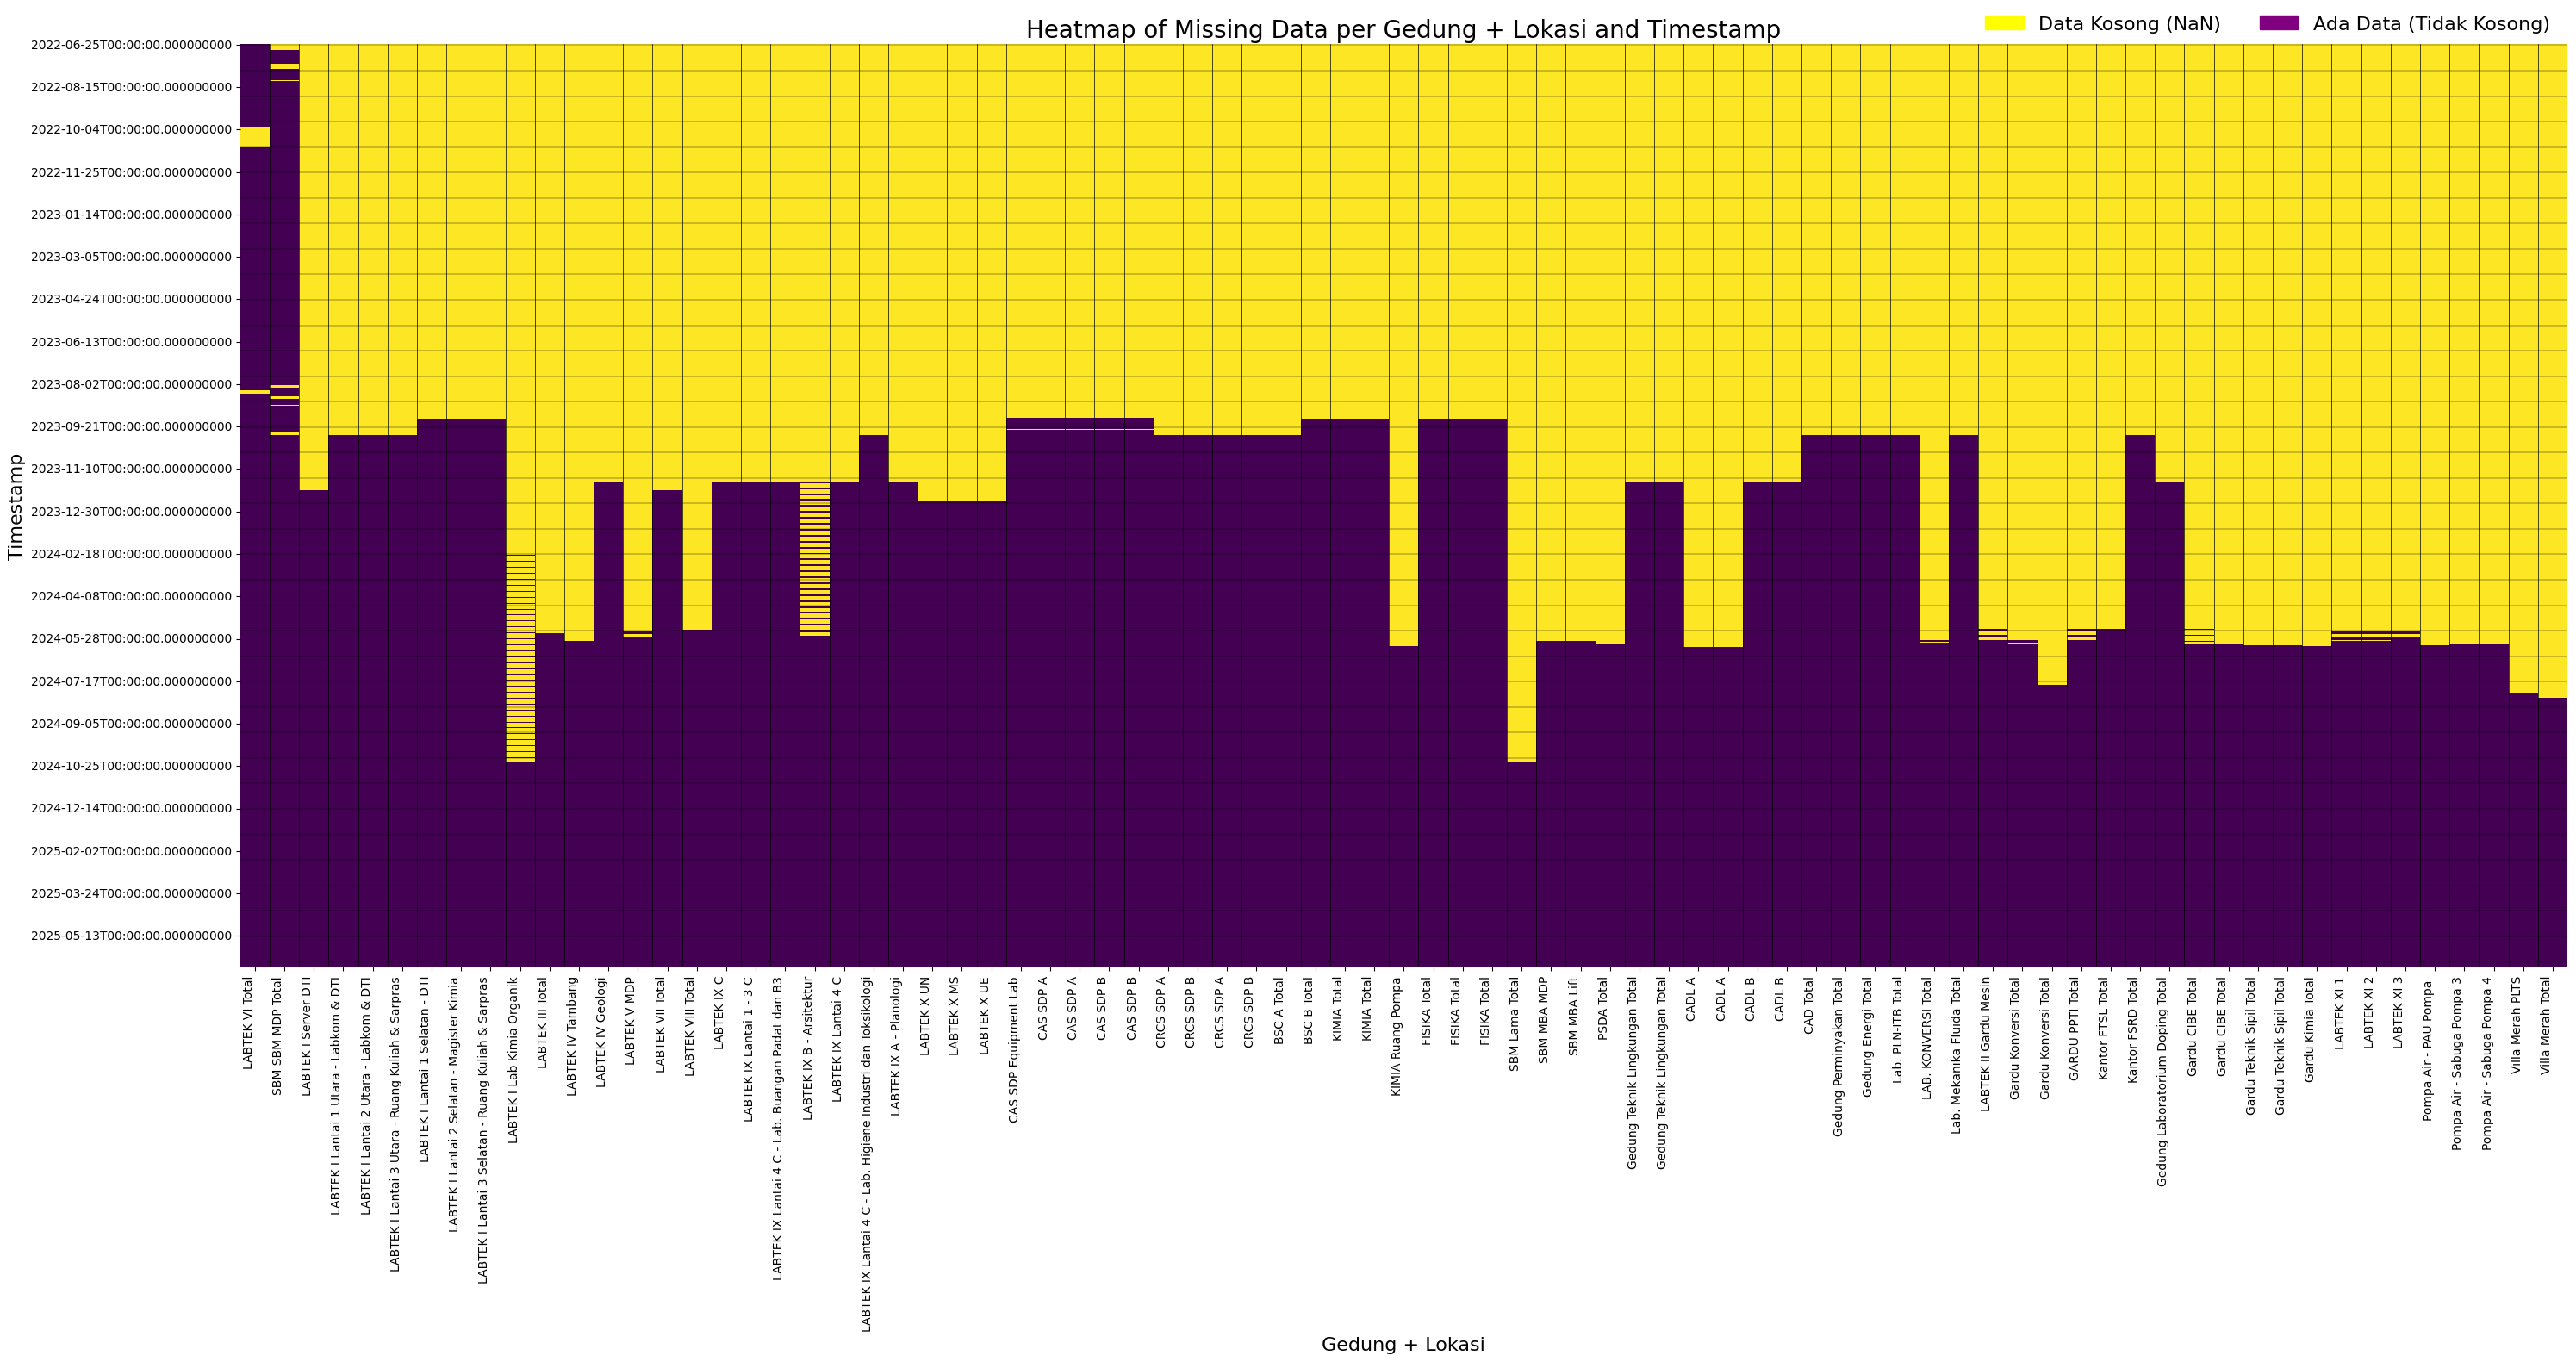

--- Analisis Missing Data Selesai ---

Analisis selesai.


In [22]:
# Visualisasi missing data pivot table
path_data_pivot_harian = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet'
path_meter_id = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet' # File info meter_id

tabel_hasil = mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=path_data_pivot_harian,
    path_file_info_meter=path_meter_id, # Menggunakan file info meter
    figsize_heatmap=(30, 16),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
    grid_horizontal_interval=30 # Sesuaikan jika perlu
)

if tabel_hasil is not None:
    print("\nAnalisis selesai.")

## Menghilangkan data kosong

### Mengambil data dari 1 Juni 2024 (data_4)

In [23]:
# load file
df_jam_3 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
df_hari_3 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')


In [24]:
# Menentukan tanggal mulai filter
tanggal_mulai_filter = '2024-06-01'

df_hari_4 = df_hari_3.copy()
df_jam_4 = df_jam_3.copy()

# Melakukan filter
# df_harian_pivoted.index sudah bertipe DatetimeIndex
df_hari_4 = df_hari_4[df_hari_4.index >= tanggal_mulai_filter]
df_jam_4 = df_jam_4[df_jam_4.index >= tanggal_mulai_filter]

# save file ke versi 4
df_hari_4.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet')
df_jam_4.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet')
df_hari_4.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv')
df_jam_4.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_4.csv')

# Menampilkan informasi setelah filter
print(f"Shape data jam sebelum filter: {df_jam_3.shape}")
print(f"\nShape data jam SETELAH filter: {df_jam_4.shape}")
print(f"\nShape data hari SETELAH filter: {df_hari_4.shape}")
print(f"\nShape data hari sebelum filter: {df_hari_3.shape}")

## ternyata shape data jam dan hari jumlah kolomnya betbeda. jika mengacu pada table meter_id harusnya jumlhnya 116.

Shape data jam sebelum filter: (25753, 101)

Shape data jam SETELAH filter: (9185, 101)

Shape data hari SETELAH filter: (383, 79)

Shape data hari sebelum filter: (1087, 79)



--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
   meter_id  jumlah_missing    fakultas          gedung             lokasi           ip  modbus_slave  include  power_meter  persentase_missing
43   117112             142         SBM        SBM Lama              Total  10.18.65.30           112        1         2200           37.075718
9    101201             122       FMIPA        LABTEK I  Lab Kimia Organik   10.1.22.67           100        1         5350           31.853786
78   500002              66  UNIT KERJA     Villa Merah              Total   10.8.62.16             1        0         2200           17.232376
77   500001              60        PLTS     Villa Merah               PLTS  

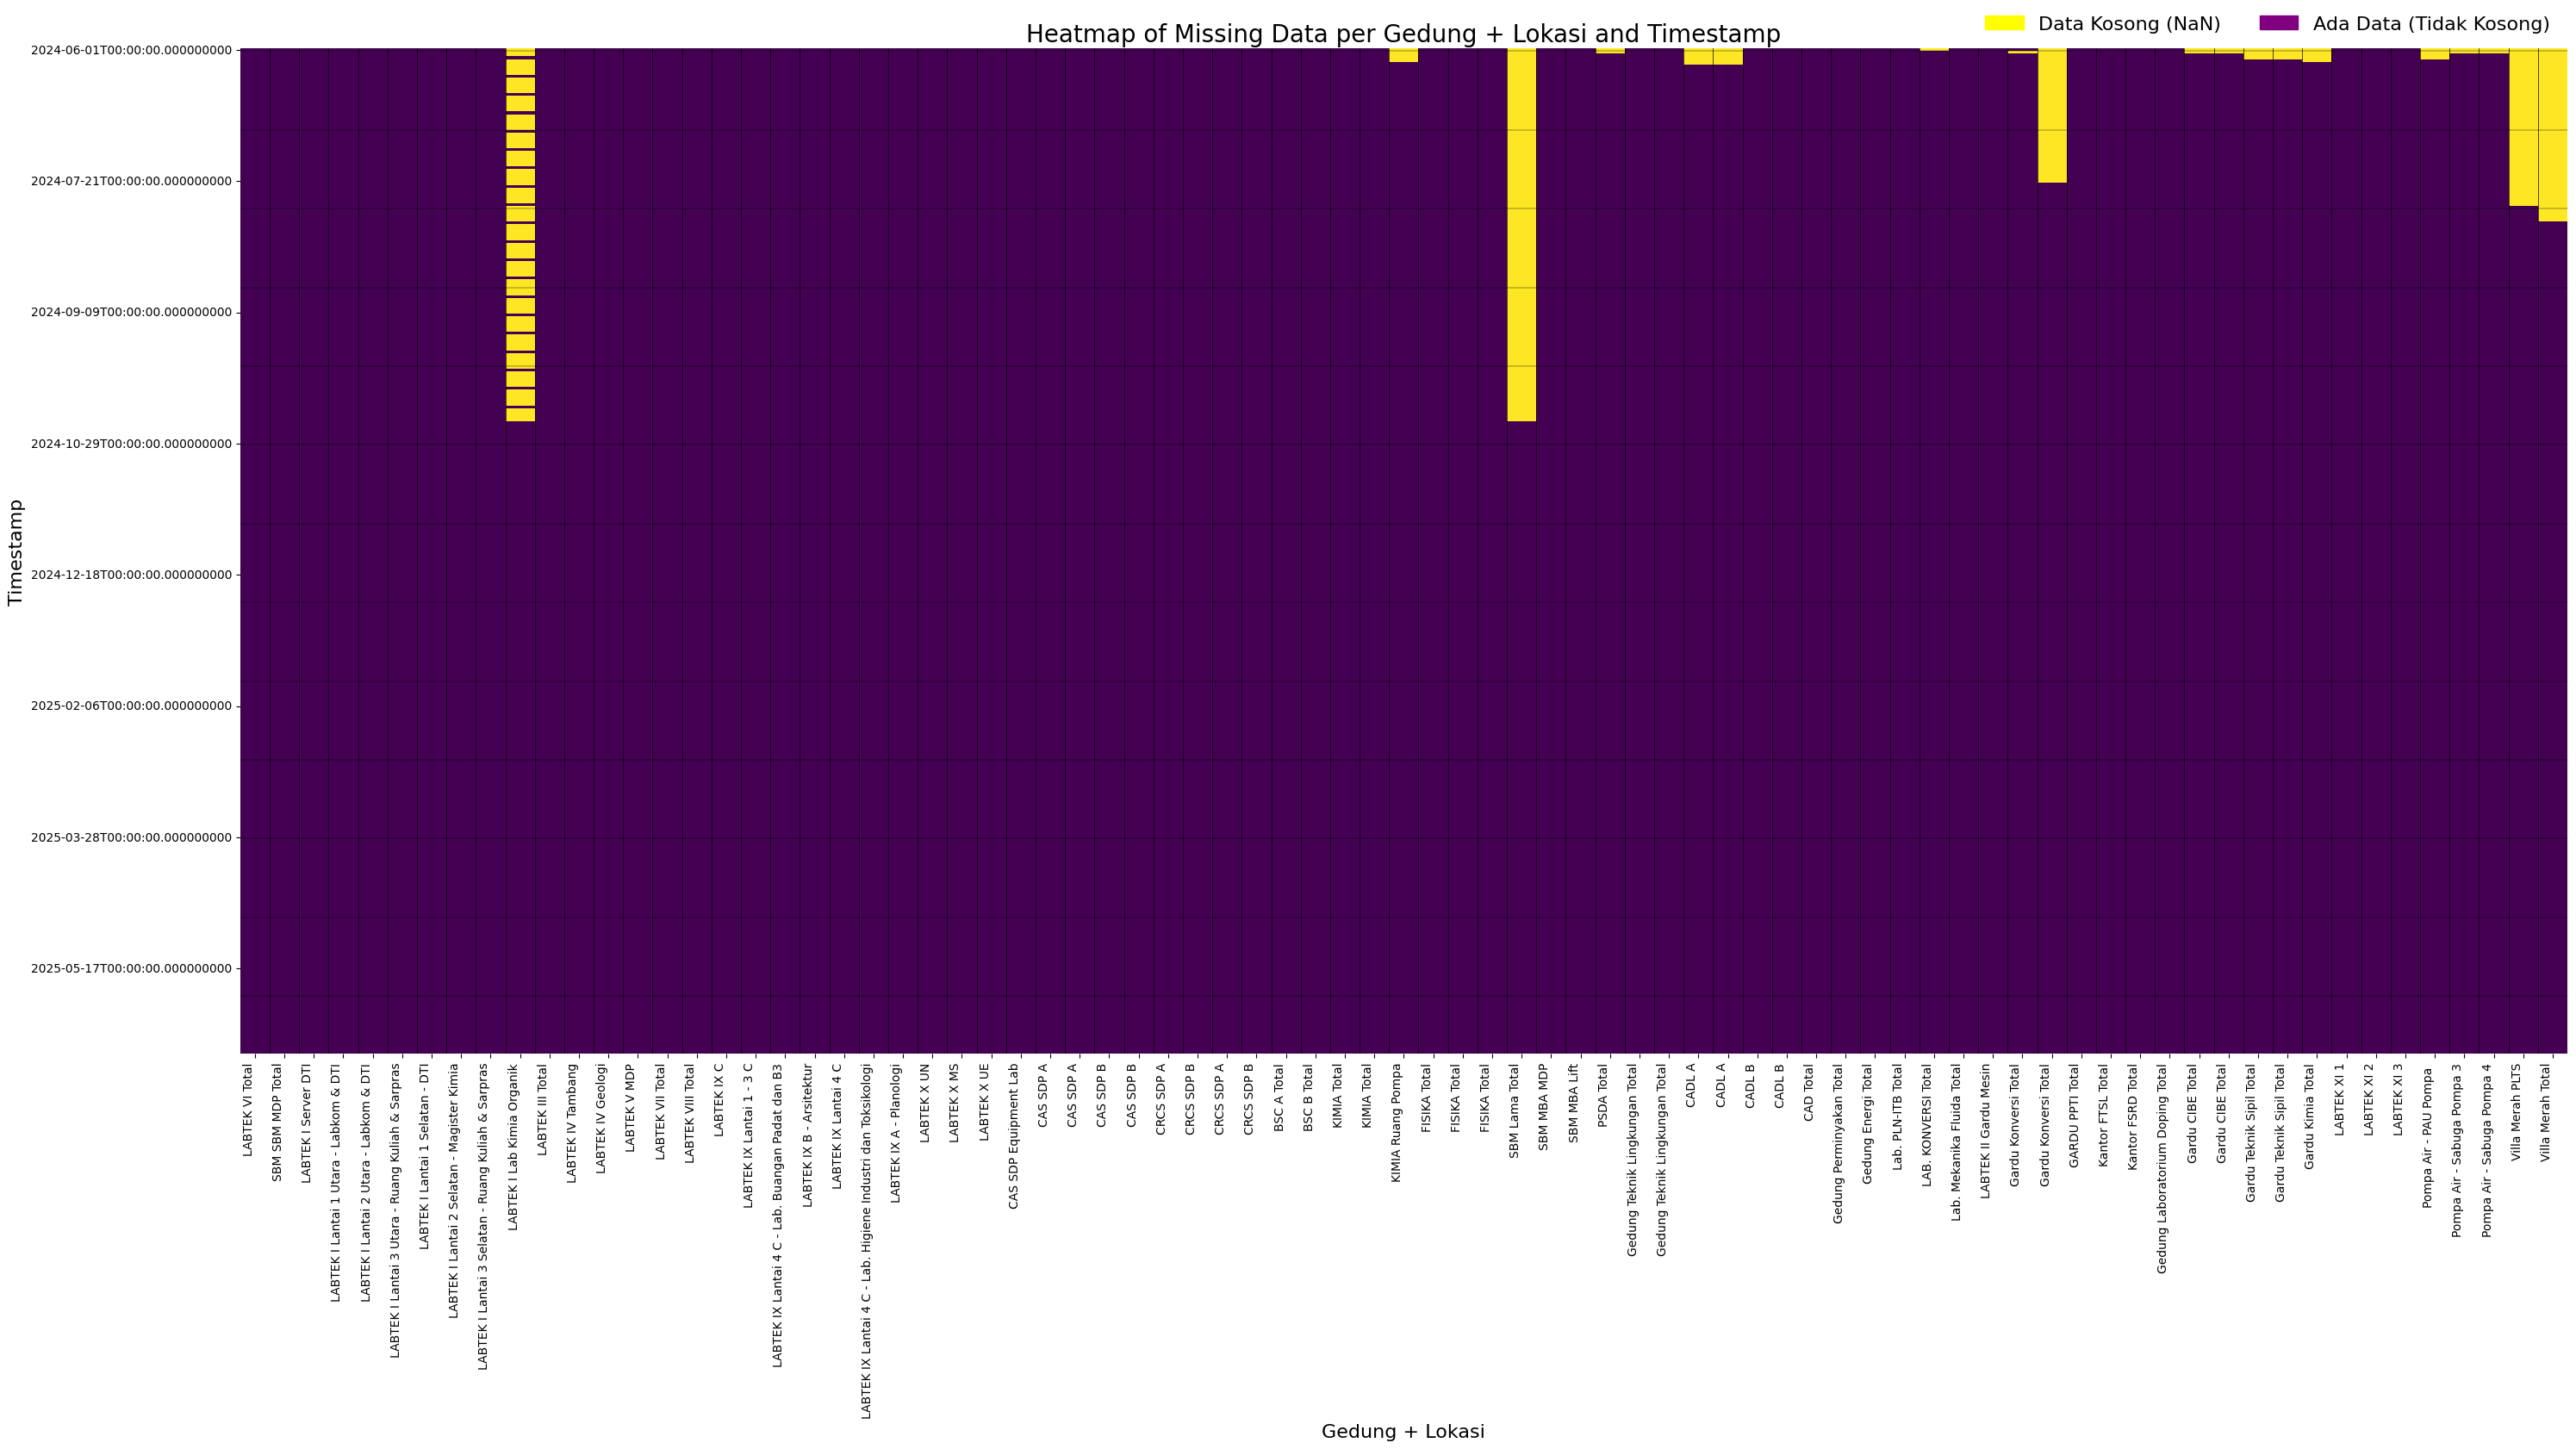

--- Analisis Missing Data Selesai ---

Analisis selesai.


In [25]:
# visualisasi missing data

path_data_pivot_harian = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet'
path_meter_id = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet' # File info meter Bapak

tabel_hasil = mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=path_data_pivot_harian,
    path_file_info_meter=path_meter_id, # Menggunakan file info meter
    figsize_heatmap=(30, 17),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
    grid_horizontal_interval=30 # Sesuaikan jika perlu
)

if tabel_hasil is not None:
    print("\nAnalisis selesai.")

### Mengisi data kosong (data_5)

#### data_hari_5

In [26]:
# Panggil fungsi untuk mengisi nilai kosong dengan metode bfill dan menghapus kolom dengan nilai kosong > 10%
try:
    data_hasil_bfill_hari = mydef.process_data_with_bfill(
        file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv',
        info_meter_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet'
    )
except Exception as e:
    print(f"Terjadi kesalahan saat menjalankan proses utama: {e}")


Memproses file data energi: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv
Index (timestamp) terdeteksi. Jumlah data waktu: 383

Jumlah kolom meter_id awal: 79
Total data kosong awal di semua meter_id: 487

Filter kolom meter_id berdasarkan >10% data kosong:
Jumlah kolom meter_id yang dihapus: 5
Jumlah kolom meter_id yang tersisa: 74
Total data kosong pada meter_id tersisa (sebelum bfill): 46

Daftar meter_id yang dihapus karena missing > 10%:
meter_id         gedung            lokasi
  130002 Gardu Konversi             Total
  101201       LABTEK I Lab Kimia Organik
  117112       SBM Lama             Total
  500001    Villa Merah              PLTS
  500002    Villa Merah             Total

Proses Backward Fill (bfill) diterapkan per kolom meter_id:
Total data kosong setelah bfill: 0
Semua data kosong pada kolom meter_id yang tersisa berhasil diisi dengan bfill.

Cuplikan 5 baris pertama dari data hasil (setelah filter dan bfill):
                   5      163   101010   

In [27]:
# Save hasil bfill ke file baru
if data_hasil_bfill_hari is not None:
    data_hasil_bfill_hari.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet')
    data_hasil_bfill_hari.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv', index=True)
    print("Data hasil bfill disimpan ke file baru.")   

Data hasil bfill disimpan ke file baru.



--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
  meter_id  jumlah_missing fakultas     gedung                         lokasi             ip  modbus_slave  include  power_meter  persentase_missing
0        5               0      FTI  LABTEK VI                          Total  192.168.1.111             5        1         1200                 0.0
1      163               0      SBM        SBM                  SBM MDP Total           None             0        1            0                 0.0
2   101010               0    FMIPA   LABTEK I                     Server DTI    10.1.100.10            10        1         2200                 0.0
3   101011               0    FMIPA   LABTEK I  Lantai 1

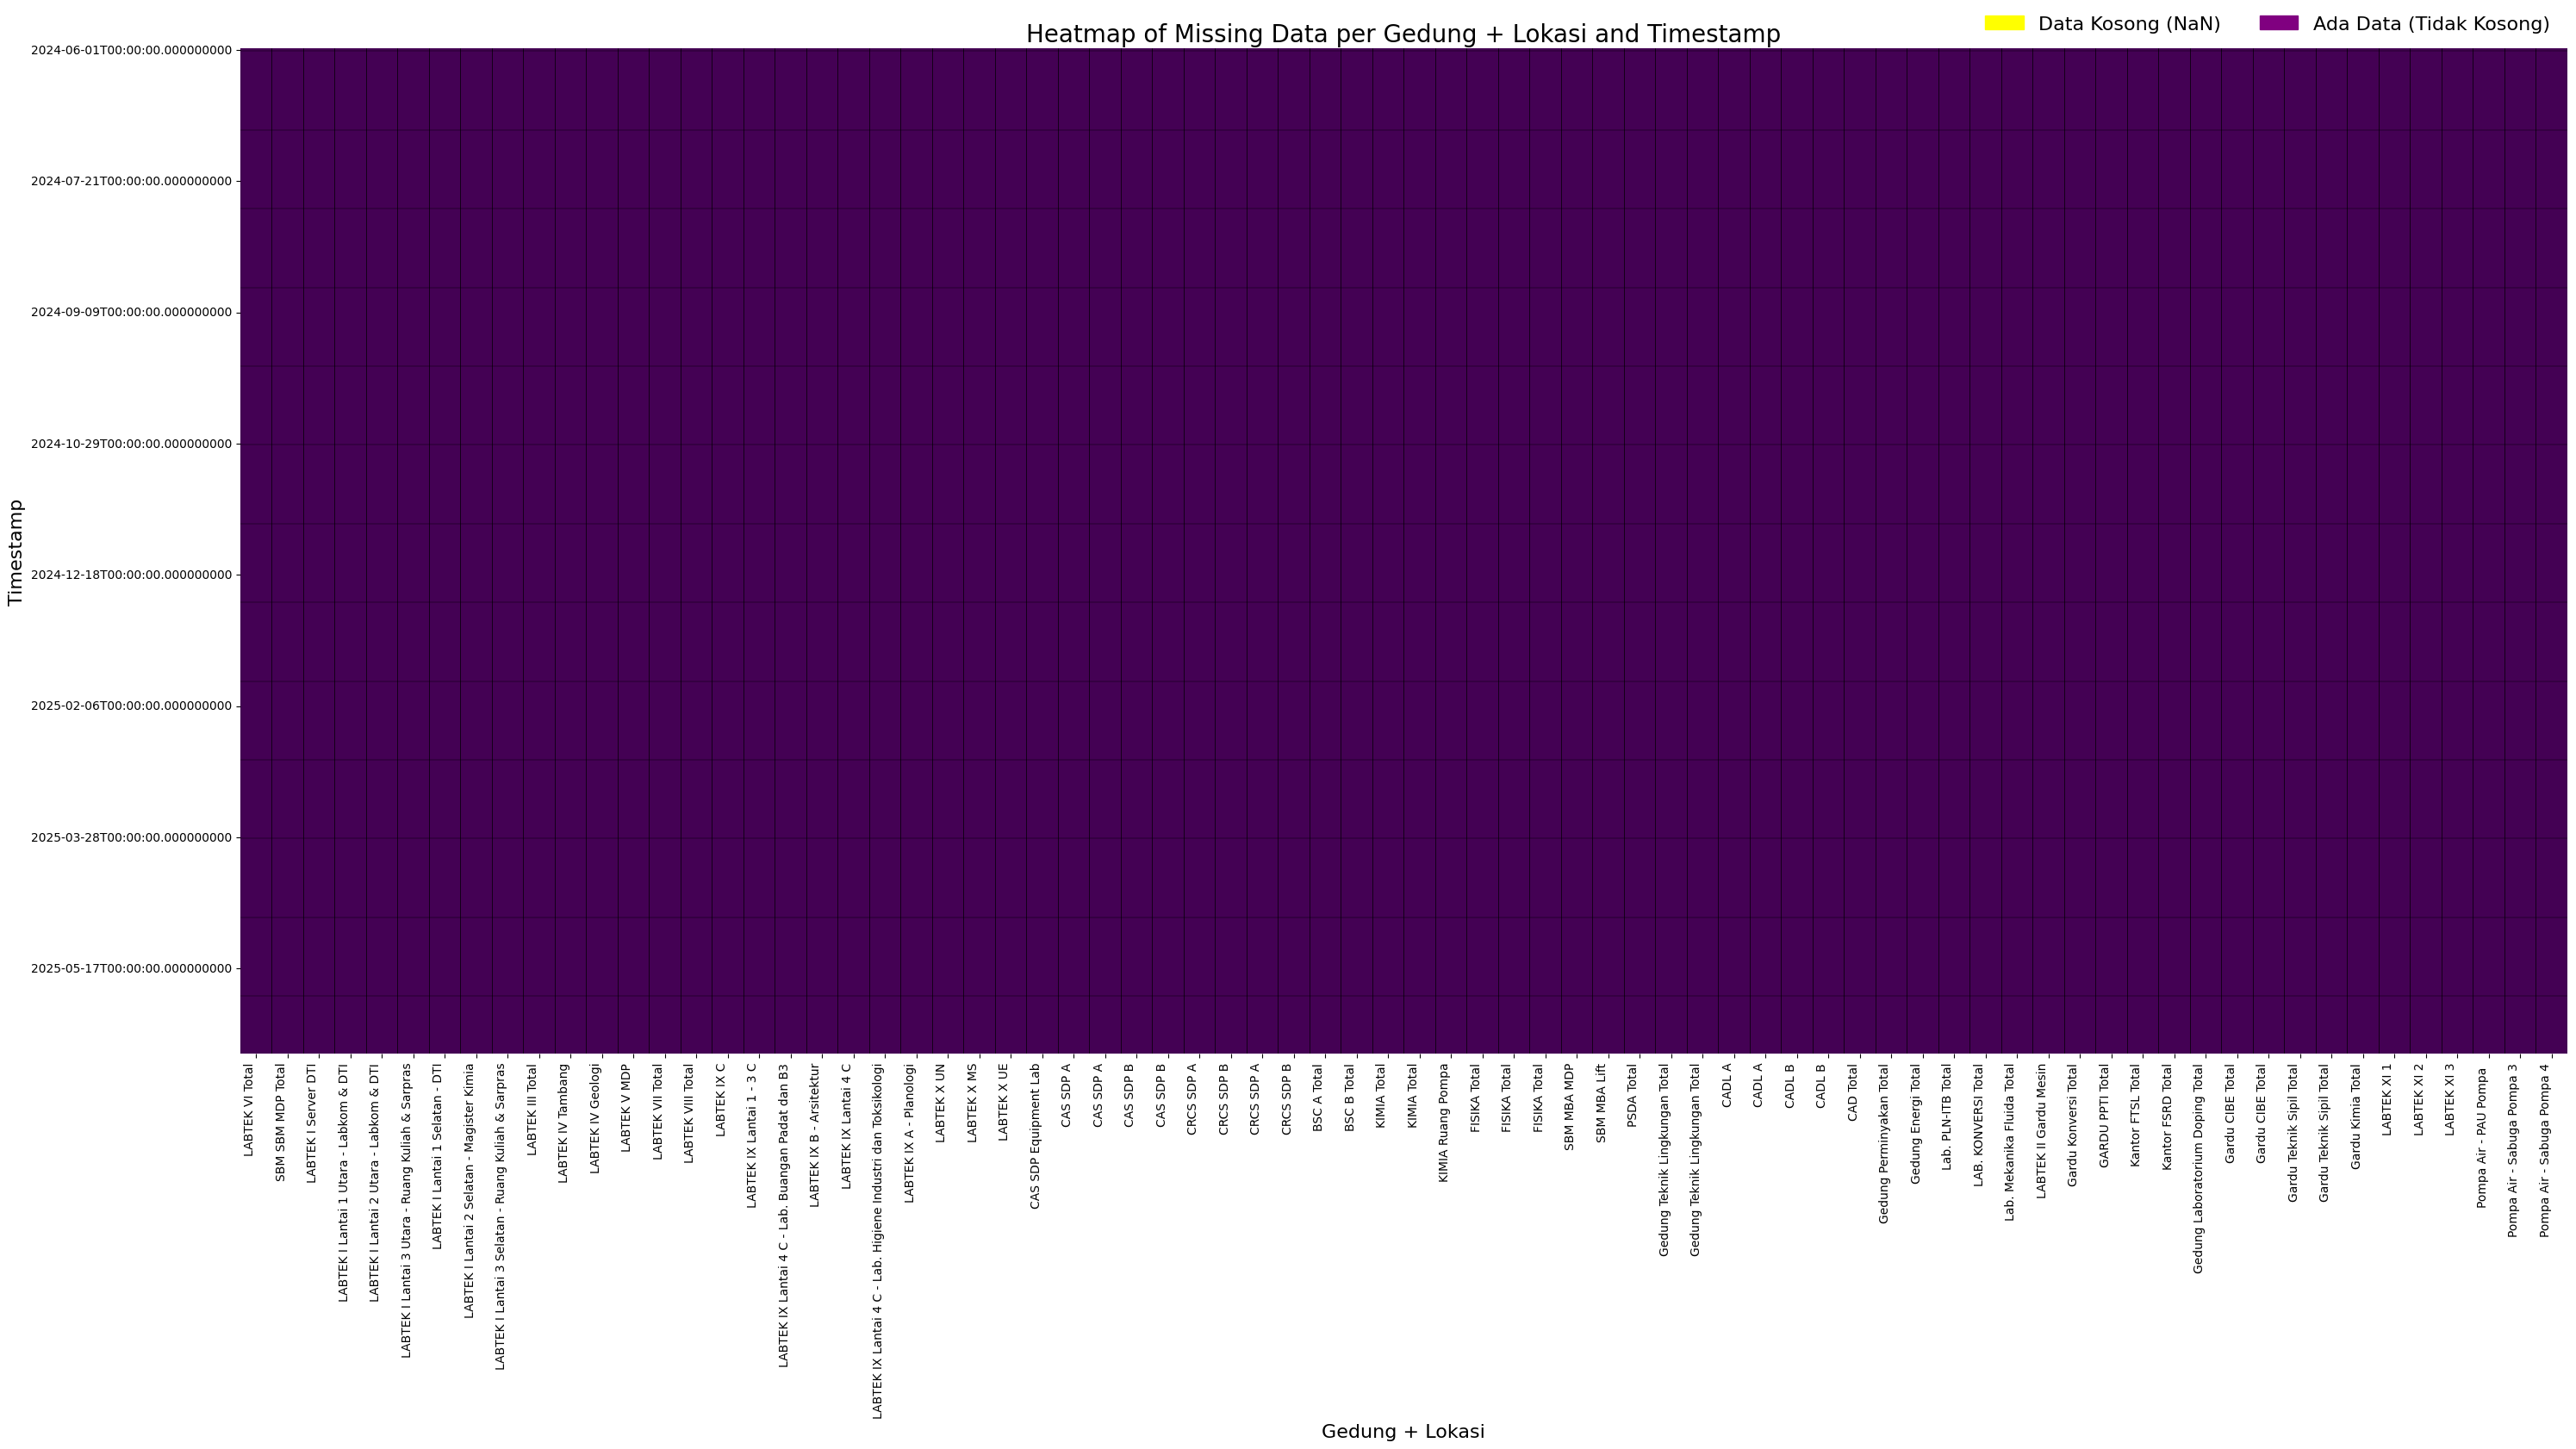

--- Analisis Missing Data Selesai ---


,meter_id,jumlah_missing,fakultas,gedung,lokasi,ip,modbus_slave,include,power_meter,persentase_missing
0,5,0,FTI,LABTEK VI,Total,192.168.1.111,5,1,1200,0.0
1,163,0,SBM,SBM,SBM MDP Total,None,0,1,0,0.0
2,101010,0,FMIPA,LABTEK I,Server DTI,10.1.100.10,10,1,2200,0.0
3,101011,0,FMIPA,LABTEK I,Lantai 1 Utara - Labkom & DTI,10.1.100.10,11,1,2200,0.0
4,101012,0,FMIPA,LABTEK I,Lantai 2 Utara - Labkom & DTI,10.1.100.10,12,1,2200,0.0
...,...,...,...,...,...,...,...,...,...,...
69,150002,0,SITH,LABTEK XI,2,167.205.38.93,2,0,2200,0.0
70,150003,0,SITH,LABTEK XI,3,167.205.38.93,3,0,2200,0.0
71,190043,0,-,Pompa Air - PAU,Pompa,10.45.10.23,43,0,2200,0.0
72,190046,0,-,Pompa Air - Sabuga,Pompa 3,10.18.205.147,46,0,2200,0.0


In [28]:
mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet',
    path_file_info_meter=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet',
    figsize_heatmap=(30, 17),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
)

In [29]:
# Imputasi dengan metode lain ??? (gunakan data_hasil_bfill sebagai dasar)
if data_hasil_bfill_hari is not None:
    data_ffill = data_hasil_bfill_hari.ffill()
    data_mean = data_hasil_bfill_hari.fillna(data_hasil_bfill_hari.mean())
    data_interp = data_hasil_bfill_hari.interpolate(method='linear')

    # Bandingkan statistik
    print("Statistik bfill:\n", data_hasil_bfill_hari.describe())
    print("Statistik ffill:\n", data_ffill.describe())
    print("Statistik mean:\n", data_mean.describe())
    print("Statistik interpolasi:\n", data_interp.describe())
else:
    print("Data 'data_hasil_bfill' tidak tersedia atau kosong.")

Statistik bfill:
                  5          163      101010      101011      101012  \
count   383.000000   383.000000  383.000000  383.000000  383.000000   
mean    949.110689   604.893415   61.074142   24.212172   59.898095   
std     271.185918   283.597445   27.258354   13.441592   25.245778   
min     335.079000   166.873000   34.656100   11.931100   19.776400   
25%     692.762500   292.482500   45.544900   15.738800   40.979850   
50%     984.349000   668.285000   50.036100   17.411300   55.953100   
75%    1167.260000   845.710000   65.919150   29.175600   72.383050   
max    1528.330000  1231.830000  183.224000   79.471800  146.975000   

           101013      101021      101022      101023      103001  ...  \
count  383.000000  383.000000  383.000000  383.000000  383.000000  ...   
mean    31.404670   14.577464   38.504092   20.489674  588.612595  ...   
std     15.464659    7.150761   13.128345   14.284978  225.182847  ...   
min      1.489670    4.229470   13.867300    0

In [30]:
# Cek jumlah data kosong (NaN) pada setiap kolom dan total di data_hasil_bfill

if data_hasil_bfill_hari is not None:
    # Jumlah NaN per kolom
    print("Jumlah data kosong (NaN) per kolom meter_id:")
    print(data_hasil_bfill_hari.isnull().sum())

    # Total NaN di seluruh DataFrame
    total_nan = data_hasil_bfill_hari.isnull().sum().sum()
    print(f"\nTotal data kosong (NaN) di seluruh DataFrame: {total_nan}")
else:
    print("Data 'data_hasil_bfill' tidak tersedia atau kosong.")

Jumlah data kosong (NaN) per kolom meter_id:
5         0
163       0
101010    0
101011    0
101012    0
         ..
150002    0
150003    0
190043    0
190046    0
190047    0
Length: 74, dtype: int64

Total data kosong (NaN) di seluruh DataFrame: 0


#### data_jam_5

In [31]:
# Panggil fungsi untuk mengisi nilai kosong dengan metode bfill dan menghapus kolom dengan nilai kosong > 10%
try:
    data_hasil_bfill_jam = mydef.process_data_with_bfill(
        file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet',
        info_meter_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet'
    )
except Exception as e:
    print(f"Terjadi kesalahan saat menjalankan proses utama: {e}")

Info: File Parquet 'data_jam_4.parquet' sudah memiliki index 'timestamp'.

Memproses file data energi: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet
Index (timestamp) terdeteksi. Jumlah data waktu: 9185

Jumlah kolom meter_id awal: 101
Total data kosong awal di semua meter_id: 214954

Filter kolom meter_id berdasarkan >10% data kosong:
Jumlah kolom meter_id yang dihapus: 27
Jumlah kolom meter_id yang tersisa: 74
Total data kosong pada meter_id tersisa (sebelum bfill): 1881

Daftar meter_id yang dihapus karena missing > 10%:
meter_id         gedung            lokasi
  130002 Gardu Konversi             Total
  101201       LABTEK I Lab Kimia Organik
  117112       SBM Lama             Total
  500001    Villa Merah              PLTS
  500002    Villa Merah             Total

Meter_id berikut tidak ditemukan di tabel info_meter:
5021, 5023, 2013, 2041, 2014, 1013, 1015, 2021, 2011, 2012, 2022, 1014, 2032, 2025, 2031, 2024, 2015, 2016, 2033, 4211, 2023, 5022

Proses Back

In [32]:
# Save hasil bfill ke file baru
if data_hasil_bfill_jam is not None:
    data_hasil_bfill_jam.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_5.parquet')
    data_hasil_bfill_jam.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv', index=True)
    print("Data hasil bfill disimpan ke file baru.")   

Data hasil bfill disimpan ke file baru.


## Persiapan Data

### Menjumlahkan power dari meter_id dalam satu gedung (data_6)

In [ ]:
# DATA HARI--> load file data_hari yang sudah diisi dengan bfill
nama_file_data_hari = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv'
nama_file_mapping_hari = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\gabung_meter_id.csv'

# Panggil fungsi utama untuk memproses data
data_hasil_akhir = mydef.gabung_konsumsi_gedung_pivot_table(nama_file_data_hari, nama_file_mapping_hari)

if data_hasil_akhir is not None:
    # Menyimpan hasil akhir ke file CSV baru
    path_hasil = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet'
    data_hasil_akhir.to_parquet(path_hasil, index=False)
    data_hasil_akhir.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_6.csv', index=False)
    print(f"\nData yang telah diproses berhasil disimpan ke '{path_hasil}'")

Membaca file data pivot dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv
Membaca file pemetaan meter...

Berhasil membuat grup pemetaan meter:
{'CADL': [122141, 122131, 122121, 122111], 'CAS': [111100, 111110, 111120, 111130, 111140], 'CIBE': [145001, 145002], 'CRCS': [112021, 112111, 112120, 112110], 'FISIKA': [116003, 116002, 116001], 'Gardu Konversi': [130001, 130002], 'Gardu Teknik Sipil': [146002, 146001], 'Gedung Teknik Lingkungan': [121001, 121002], 'KIMIA': [149001, 115211, 115212, 115213], 'LABTEK I': [101011, 101010, 101012, 101013, 101021, 101022, 101023, 101201], 'LABTEK IX C': [109024, 109014, 109004, 109002, 109001], 'LABTEK X': [110001, 110002, 110003], 'LABTEK XI': [150003, 150002, 150001], 'Pompa Air - Sabuga': [190047, 190046], 'SBM MBA': [118002, 118001]}

Memulai proses penggabungan kolom...
  > Menjumlahkan 4 kolom untuk grup 'CADL'...
  > Menjumlahkan 5 kolom untuk grup 'CAS'...
  > Menjumlahkan 2 kolom untuk grup 'CIBE'...
  > Menjumlahkan 4 kolom

In [ ]:
# DATA JAM--> load file data_jam yang sudah diisi dengan bfill
nama_file_data_jam = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv'
nama_file_mapping_jam = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\gabung_meter_id.csv'

# Panggil fungsi utama untuk memproses data
data_hasil_akhir = mydef.gabung_konsumsi_gedung_pivot_table(nama_file_data_jam, nama_file_mapping_jam)

if data_hasil_akhir is not None:
    # Menyimpan hasil akhir ke file CSV baru
    path_hasil = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet'
    data_hasil_akhir.to_parquet(path_hasil, index=False)
    data_hasil_akhir.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_6.csv', index=False)
    print(f"\nData yang telah diproses berhasil disimpan ke '{path_hasil}'")

Membaca file data pivot dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv
Membaca file pemetaan meter...

Berhasil membuat grup pemetaan meter:
{'CADL': [122141, 122131, 122121, 122111], 'CAS': [111100, 111110, 111120, 111130, 111140], 'CIBE': [145001, 145002], 'CRCS': [112021, 112111, 112120, 112110], 'FISIKA': [116003, 116002, 116001], 'Gardu Konversi': [130001, 130002], 'Gardu Teknik Sipil': [146002, 146001], 'Gedung Teknik Lingkungan': [121001, 121002], 'KIMIA': [149001, 115211, 115212, 115213], 'LABTEK I': [101011, 101010, 101012, 101013, 101021, 101022, 101023, 101201], 'LABTEK IX C': [109024, 109014, 109004, 109002, 109001], 'LABTEK X': [110001, 110002, 110003], 'LABTEK XI': [150003, 150002, 150001], 'Pompa Air - Sabuga': [190047, 190046], 'SBM MBA': [118002, 118001]}

Memulai proses penggabungan kolom...
  > Menjumlahkan 4 kolom untuk grup 'CADL'...
  > Menjumlahkan 5 kolom untuk grup 'CAS'...
  > Menjumlahkan 2 kolom untuk grup 'CIBE'...
  > Menjumlahkan 4 kolom 

### Ubah nomor meter_id menjadi nama gedung (Data_7)

#### Data jam

In [ ]:
# DATA JAM--> Mengganti ID Meter dari nomor ke Nama Gedung

# 1. Tentukan path ke file 
path_data_energi = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet' 
path_file_pemetaan = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx'

# 2. Tentukan nama kolom yang berisi ID dan Nama Gedung di file pemetaan Anda
kolom_id_meter = 'Meter ID'
kolom_nama_gedung = 'Nama Gedung'

# 3. Panggil fungsi untuk mendapatkan DataFrame yang baru
df_jam_7 = mydef.ganti_id_ke_nama_gedung(
    data_path=path_data_energi,
    mapping_path=path_file_pemetaan,
    id_column=kolom_id_meter,
    name_column=kolom_nama_gedung
)

# 4. Periksa hasilnya
if df_jam_7 is not None:
    print("\nBerikut adalah 5 baris pertama dari data dengan nama gedung yang baru:")
    print(df_jam_7.head())

    # Anda bisa menyimpannya ke file baru jika perlu
    df_jam_7.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv', index=False)
    df_jam_7.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_7.parquet')
    print("\nData berhasil disimpan ke file baru.")
else:
    print("\nTerjadi kesalahan saat memproses data. Pastikan path dan kolom yang Anda berikan benar.")

Membaca file data: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet
Membaca file pemetaan: C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx
Membuat kamus pemetaan...
Mengganti nama kolom...

Proses penggantian nama kolom selesai dengan sukses!

Berikut adalah 5 baris pertama dari data dengan nama gedung yang baru:
             timestamp       CADL       CAS    CIBE      CRCS    FISIKA  \
0  2024-06-01 00:00:00  25.728068  42.93474  8.1547  23.67408  16.06765   
1  2024-06-01 01:00:00  25.863564  42.54626  8.1547  24.11177  15.98977   
2  2024-06-01 02:00:00  25.775352  42.19976  8.1547  24.32198  15.50519   
3  2024-06-01 03:00:00  25.799736  42.37082  8.1547  23.01553  15.44428   
4  2024-06-01 04:00:00  25.904408  42.31300  8.1547  22.97428  15.59319   

   Gardu Konversi  Gardu Teknik Sipil  Gedung Teknik Lingkungan      KIMIA  \
0         4.13130            13.52088                   5.12838  28.039425   
1         4.13130            1

#### Data hari

In [37]:
# DATA HARI--> Mengganti ID Meter dari nomor ke Nama Gedung

# 1. Tentukan path ke file 
path_data_energi = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet' 
path_file_pemetaan = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx'

# 2. Tentukan nama kolom yang berisi ID dan Nama Gedung di file pemetaan Anda
kolom_id_meter = 'Meter ID'
kolom_nama_gedung = 'Nama Gedung'

# 3. Panggil fungsi untuk mendapatkan DataFrame yang baru
df_hari_7 = mydef.ganti_id_ke_nama_gedung(
    data_path=path_data_energi,
    mapping_path=path_file_pemetaan,
    id_column=kolom_id_meter,
    name_column=kolom_nama_gedung
)

# 4. Periksa hasilnya
if df_hari_7 is not None:
    print("\nBerikut adalah 5 baris pertama dari data dengan nama gedung yang baru:")
    print(df_hari_7.head())

    # Anda bisa menyimpannya ke file baru jika perlu
    
    df_hari_7.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv', index=False)
    df_hari_7.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_7.parquet', index=False)
    print("\nData berhasil disimpan ke file baru.")
else:
    print("\nTerjadi kesalahan saat memproses data. Pastikan path dan kolom yang Anda berikan benar.")

Membaca file data: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet
Membaca file pemetaan: C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx
Membuat kamus pemetaan...
Mengganti nama kolom...

Proses penggantian nama kolom selesai dengan sukses!

Berikut adalah 5 baris pertama dari data dengan nama gedung yang baru:
    timestamp       CADL        CAS      CIBE       CRCS    FISIKA  \
0  2024-06-01  289.96719  1024.2750   24.1129   761.2670  396.7913   
1  2024-06-02  277.56299  1012.3752   24.1129   677.7551  354.1504   
2  2024-06-03  632.62829  1382.1854   24.1129  1233.3660  557.7196   
3  2024-06-04  640.78509  1335.7590  359.8717  1127.2560  538.1849   
4  2024-06-05  764.15639  1306.5554  339.2103  1206.1100  594.2496   

   Gardu Konversi  Gardu Teknik Sipil  Gedung Teknik Lingkungan     KIMIA  \
0         44.6276              80.065                  144.4292  607.8606   
1         12.3160              80.065                  131.90

### Cek kondisi data konsumsi listrik

In [38]:
# Rankungkan konsumsi energi gedung
# ----- 1. Pastikan path file ini sudah benar -----
file_path = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv' 
df_master_1 = pd.read_csv(file_path, index_col=0, parse_dates=True)

# ----- 2. Kode untuk menghitung statistik (tidak perlu diubah) -----
stats = df_master_1.describe().T
total_consumption = df_master_1.sum()
stats['sum'] = total_consumption

stats_to_show = stats[['mean', 'std', 'min', 'max', 'sum']].copy()
stats_to_show.columns = [
    'Rata-rata per Jam (kWh)', 
    'Stdev', 
    'Min jam (kWh)', 
    'Max jam (kWh)', 
    'Total Seluruh Data (kWh)'
]

stats_to_show = stats_to_show.sort_values(by='Total Seluruh Data (kWh)', ascending=False)


# ----- 3. Baris ini akan menyimpan hasilnya ke file Excel -----
# File Excel akan disimpan di folder yang sama dengan script ini
output_file_name = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\Rangkuman_Konsumsi_Energi_Gedung.xlsx'
stats_to_show.to_excel(output_file_name, float_format="%.2f")


# ----- 4. Cetak konfirmasi (opsional) -----
print(f"Berhasil! Hasil analisis telah disimpan ke dalam file: '{output_file_name}'")
print("\nBerikut adalah pratinjau hasilnya:")
print(stats_to_show.to_string(float_format="%.2f"))

Berhasil! Hasil analisis telah disimpan ke dalam file: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\Rangkuman_Konsumsi_Energi_Gedung.xlsx'

Berikut adalah pratinjau hasilnya:
                            Rata-rata per Jam (kWh)  Stdev  Min jam (kWh)  Max jam (kWh)  Total Seluruh Data (kWh)
LABTEK X                                      88.45  56.62          30.88         335.42                 812456.78
GARDU PPTI                                    56.75  25.96          22.48         143.03                 521233.24
CAS                                           52.78  16.88          19.26         119.68                 484744.91
LABTEK II                                     51.32  20.94          16.40         132.70                 471338.33
LABTEK VIII                                   43.50  20.06          16.58         121.15                 399536.54
LABTEK IX C                                   41.70  30.48           9.57         142.39                 382969.75
LABTEK V        

In [39]:
# ----- Kode untuk Membaca Data Harian -----
# Pastikan path ini menunjuk ke file data harian Anda
file_path = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv' 
df_master_1 = pd.read_csv(file_path, index_col=0, parse_dates=True)

# ----- Kode untuk Menghitung Statistik -----
stats = df_master_1.describe().T
total_consumption = df_master_1.sum()
stats['sum'] = total_consumption

stats_to_show = stats[['mean', 'std', 'min', 'max', 'sum']].copy()

# --- PENYESUAIAN LABEL UNTUK DATA HARIAN ---
stats_to_show.columns = [
    'Rata-rata Harian (kWh)',      # Ini adalah rata-rata konsumsi harian selama periode data
    'Stdev',                      # Standar deviasi dari konsumsi harian
    'Min Data Harian (kWh)',           # Hari dengan konsumsi terendah
    'Max Data Harian (kWh)',           # Hari dengan konsumsi tertinggi (puncak)
    'Total Data Seluruh Periode (kWh)'  # Total konsumsi selama seluruh periode (misal: bulanan)
]
# -----------------------------------------

# Mengurutkan berdasarkan total konsumsi selama periode tersebut
stats_to_show = stats_to_show.sort_values(by='Total Data Seluruh Periode (kWh)', ascending=False)

# ----- Cetak Hasil -----
# --- PENYESUAIAN JUDUL ---
print("Ringkasan Statistik Konsumsi Energi Harian per Gedung")
print("(Diurutkan dari total konsumsi tertinggi ke terendah)")
print(stats_to_show.to_string(float_format="%.2f"))

Ringkasan Statistik Konsumsi Energi Harian per Gedung
(Diurutkan dari total konsumsi tertinggi ke terendah)
                            Rata-rata Harian (kWh)  Stdev  Min Data Harian (kWh)  Max Data Harian (kWh)  Total Data Seluruh Periode (kWh)
LABTEK X                                   2121.10 679.84                 852.54                3573.61                         812381.24
GARDU PPTI                                 1357.10 356.22                 620.12                2168.98                         519769.84
CAS                                        1265.52 242.85                 539.62                1766.96                         484695.90
LABTEK II                                  1230.23 282.53                 498.88                1796.11                         471178.90
LABTEK VIII                                1043.13 246.04                 443.54                1512.07                         399517.21
LABTEK IX C                                 999.89 368.72       

## Data suhu

In [42]:
# Meringkas data suhu per menit menjadi per jam dengan rata-rata
path_file_input_suhu = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet' 
path_file_output_suhu = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet'
# Contoh: path_file_output_suhu = r'D:\Dataset\Suhu\hasil\data_suhu_juli_per_jam.parquet'

print(f"Memproses file: {path_file_input_suhu}")
# Memanggil fungsi dengan menyertakan path output
hasil_data_per_jam = mydef.proses_data_suhu_ringkas(path_file_input_suhu, path_file_output_suhu) 

if hasil_data_per_jam is not None:
    print("\nProses selesai.")
    # Pesan penyimpanan sekarang akan muncul dari dalam fungsi jika path_output diberikan
else:
    print("\nProses gagal atau tidak menghasilkan data.")

Memproses file: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet

Data suhu per jam (rata-rata jam sebelumnya):
                     avg_temp_previous_hour
stationDateTime                            
2022-07-04 12:00:00               29.023810
2022-07-04 13:00:00               29.670000
2022-07-04 14:00:00               29.355000
2022-07-04 15:00:00               28.686667
2022-07-04 16:00:00               27.683333
2022-07-04 17:00:00               26.775000
2022-07-04 18:00:00               25.380000
2022-07-04 19:00:00               24.393333
2022-07-04 20:00:00               23.525000
2022-07-04 21:00:00               22.796667
Hasil disimpan ke: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet dan C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.csv

Hasil berhasil disimpan ke: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet

Proses selesai.



--- Memulai Visualisasi Titik dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam.csv ---
Data berhasil dibaca dan diproses.
Plot berhasil disimpan di: C:\MyFolder\Git\TA_SpatioTemporal\Gambar\plot_suhu_per_jam.png
Menampilkan plot...


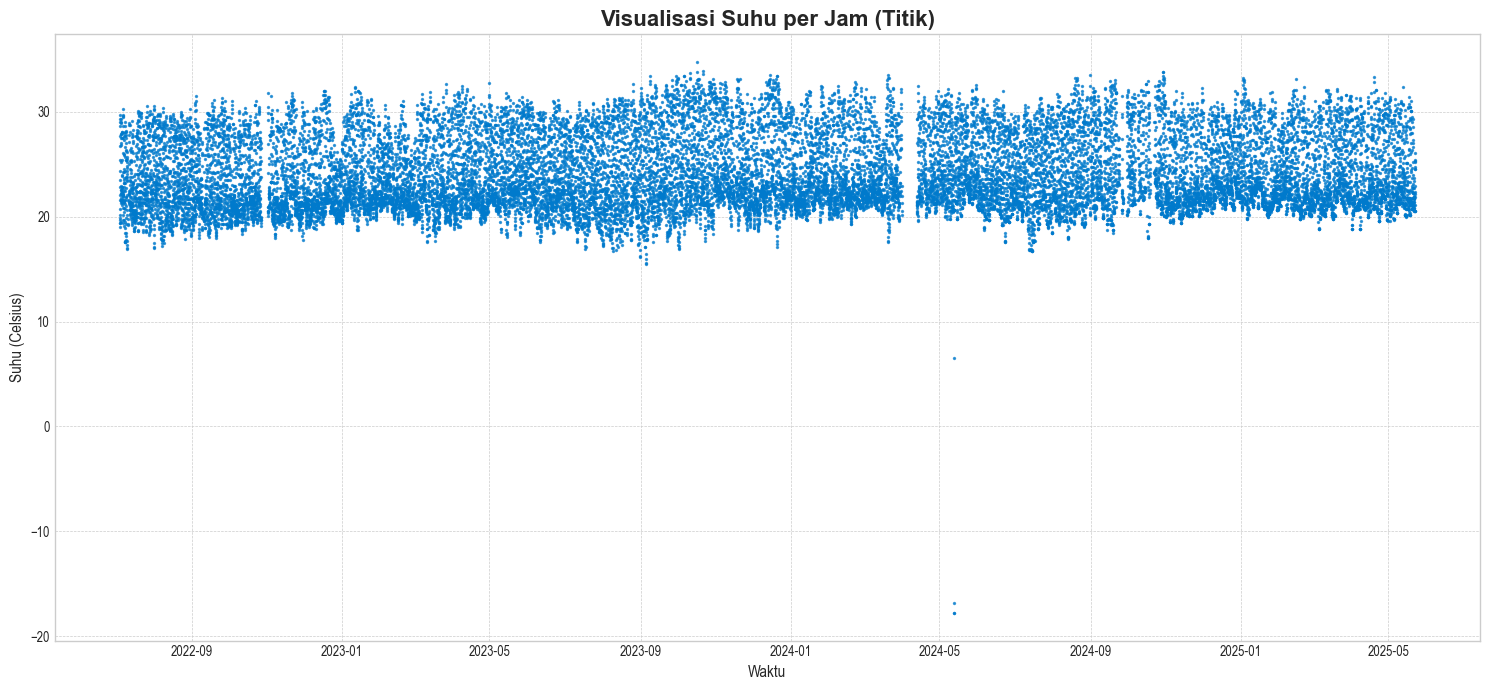

--- Proses Visualisasi Titik Selesai ---


In [43]:
# Visualisasi data suhu per jam
mydef.plot_suhu_perjam_titik(
    file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam.csv',
    path_output_gambar=r'C:\MyFolder\Git\TA_SpatioTemporal\Gambar\plot_suhu_per_jam.png',
   )

In [44]:
# rangkuman data suhu yang hilang per bulan
mydef.rangkum_missing_data_per_bulan(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet')


--- Memulai Rangkuman Data Kosong per Bulan untuk: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet ---
Data berhasil dibaca.
'stationDateTime' tidak ditemukan di kolom. Mengecek apakah ia adalah index...
Benar, kolom waktu sudah menjadi index. Melanjutkan proses.
Pra-pemrosesan data selesai.
Me-resample data ke frekuensi 'h'...
Merangkum hasil per bulan...
--- Rangkuman Selesai ---


,Jumlah Titik Diharapkan,Jumlah Titik Kosong,Jumlah Titik Ada,Persentase Kosong (%)
stationDateTime,,,,
2022-07,660,23,637,3.48
2022-08,744,0,744,0.00
2022-09,720,23,697,3.19
2022-10,744,108,636,14.52
2022-11,720,25,695,3.47
2022-12,744,0,744,0.00
2023-01,744,23,721,3.09
2023-02,672,0,672,0.00
2023-03,744,23,721,3.09


In [45]:
# =======================================================================
# SEL 1: MEMPROSES DATA
# Tujuan: Membaca file Parquet asli, membersihkan, mengisi nilai kosong,
#         dan menyimpan hasilnya ke file CSV dan Parquet baru.
# Catatan: Nilai kosong diisi dengan rata-rata suhu per jam untuk 
#          waktu yang sama di hari lainnya
# =======================================================================

print("Memulai proses pengolahan data suhu...")

# Panggil fungsi dari file mydef.py untuk mengolah data
# df_hasil_lengkap akan berisi data yang sudah diolah dan kolom 'year', 'month'
df_hasil_lengkap = mydef.olah_data_suhu(
    file_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet',
    file_output_csv=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam_2_lengkap.csv',
    file_output_parquet=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam_2_lengkap.parquet',
    nama_kolom_timestamp='stationDateTime',
    nama_kolom_suhu='avg_temp_previous_hour'
)

if df_hasil_lengkap is not None:
    print("\nProses pengolahan data berhasil diselesaikan.")
    print(f"Data hasil olah memiliki {len(df_hasil_lengkap)} baris.")
else:
    print("\nProses pengolahan data GAGAL. Periksa pesan error di atas.")



Memulai proses pengolahan data suhu...
Mulai proses pengolahan data suhu dari file: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet'
Data bersih berhasil disimpan ke file CSV: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam_2_lengkap.csv'
Data bersih berhasil disimpan ke file Parquet: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam_2_lengkap.parquet'

Proses pengolahan data berhasil diselesaikan.
Data hasil olah memiliki 25930 baris.


c:\MyFolder\Git\TA_SpatioTemporal\Code\mydef.py:970: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_complete[nama_kolom_suhu].interpolate(method='linear', limit_direction='both', inplace=True)



Memulai proses visualisasi...


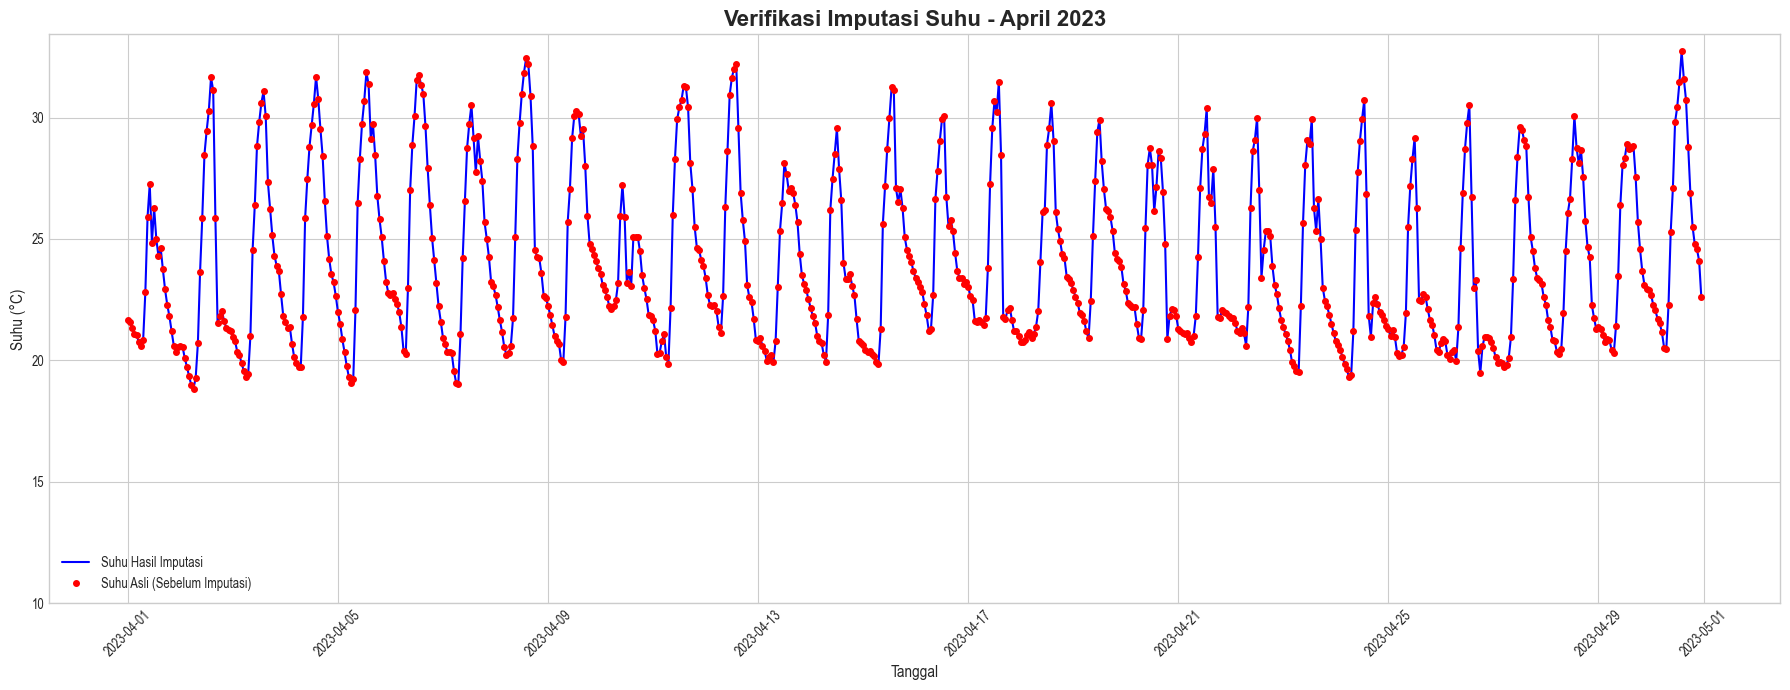

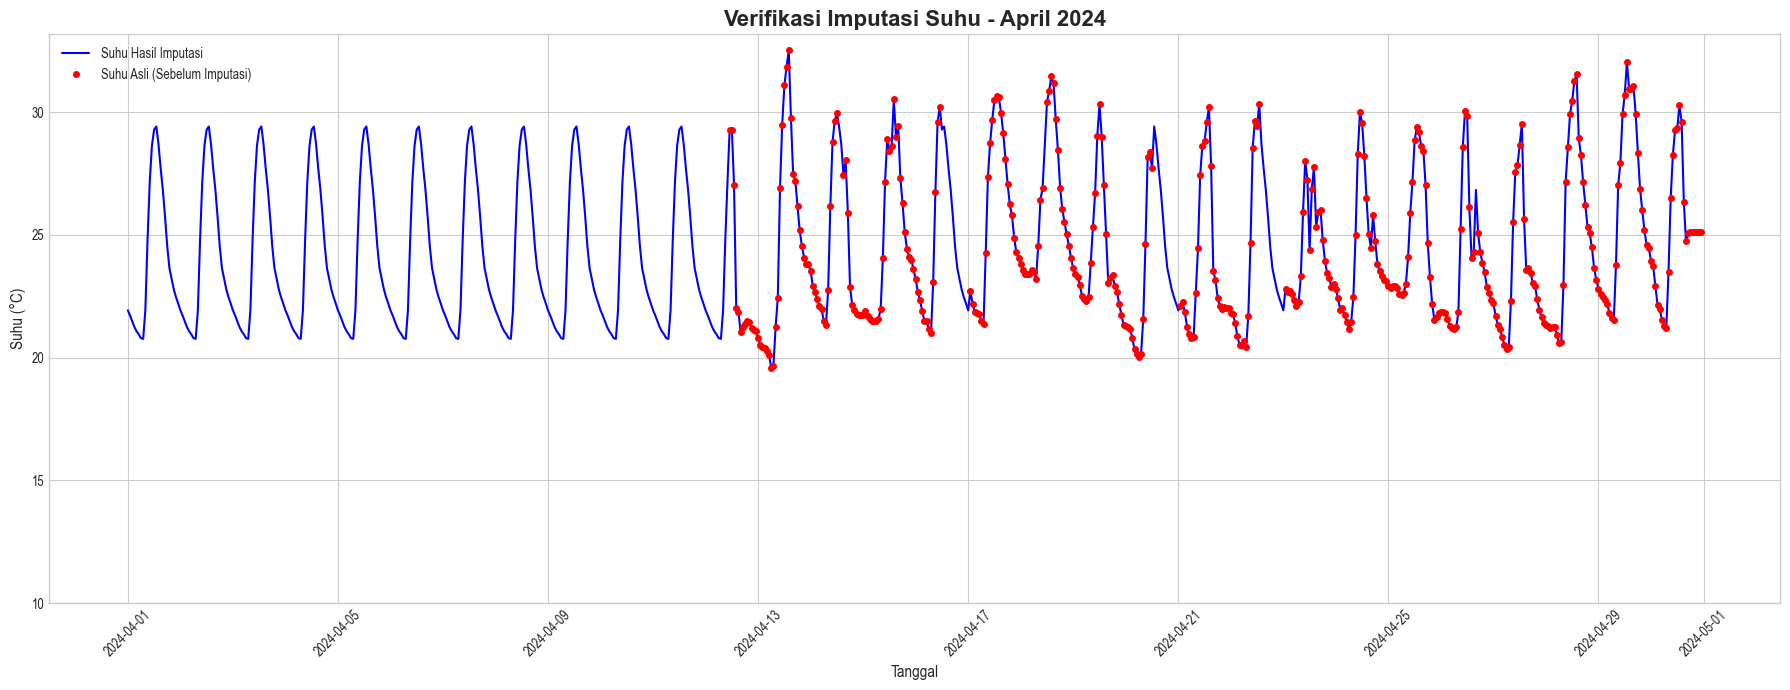

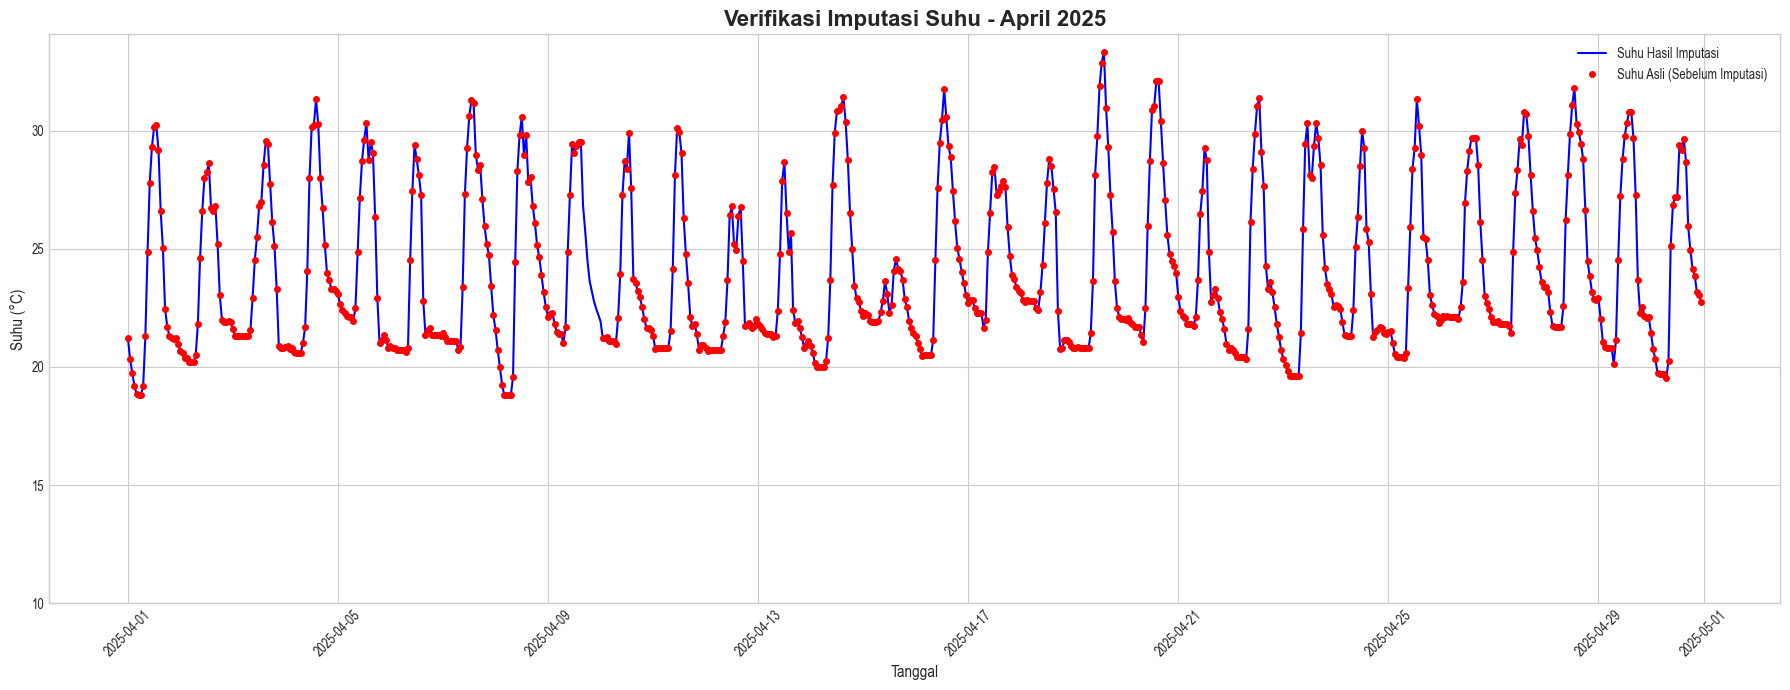

In [46]:
# =======================================================================
# SEL 2: VISUALISASI HASIL
# Tujuan: Menampilkan perbandingan antara data asli (sebelum diolah)
#         dengan data yang sudah diisi (hasil imputasi) dalam bentuk grafik.
# =======================================================================

# Pastikan sel pertama sudah dijalankan dan berhasil
if 'df_hasil_lengkap' in locals() and df_hasil_lengkap is not None:
    print("\nMemulai proses visualisasi...")
    
    # Untuk perbandingan, muat kembali data ASLI (sebelum diolah)
    df_asli = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet')
    
    # --- PERBAIKAN: Cek dan pastikan kolom timestamp ada ---
    # Jika 'stationDateTime' tidak ada sebagai kolom, kemungkinan ia adalah index.
    if 'stationDateTime' not in df_asli.columns:
        df_asli.reset_index(inplace=True) # Ubah index menjadi kolom
    
    # Setelah reset, jika kolom baru bernama 'index', ganti namanya
    if 'index' in df_asli.columns and 'stationDateTime' not in df_asli.columns:
        df_asli.rename(columns={'index': 'stationDateTime'}, inplace=True)
    # --- Akhir Perbaikan ---

    # Panggil fungsi visualisasi dari mydef.py
    # Ganti nilai 'plot_month' sesuai kebutuhan:
    # -> Gunakan 'all' untuk menampilkan grafik semua bulan.
    # -> Gunakan angka bulan (misal: 1 untuk Januari, 7 untuk Juli) untuk bulan spesifik.
    mydef.visualisasi_imputasi_suhu(
        df_complete=df_hasil_lengkap, 
        df_original=df_asli,
        nama_kolom_timestamp='stationDateTime',
        nama_kolom_suhu='avg_temp_previous_hour',
        plot_month=4  # <-- UBAH DI SINI (misal: "7" untuk bulan Juli, atau "all" untuk semua bulan)
    )
else:
    print("Variabel 'df_hasil_lengkap' tidak ditemukan atau kosong. Jalankan sel pertama terlebih dahulu.")


In [47]:
import pandas as pd

cobashape = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv')
cobashape.shape

cobashape2 = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv')
cobashape2.shape

(9185, 41)

# Persiapan Modelling

## Unification Data Konsumsi dan Suhu

In [48]:
# Membuat file format panjang dari data konsumsi energi per jam
import pandas as pd

# Baca file data energi Anda dari format Parquet.
df_lebar = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_7.parquet')

# --- Logika untuk Menangani Timestamp dari File Parquet ---
# File Parquet sering menyimpan kolom waktu sebagai 'index'.
# Langkah pertama adalah mengubah index tersebut menjadi kolom biasa.
df_lebar.reset_index(inplace=True)

# Setelah reset_index, ada dua kemungkinan:
# 1. Kolom waktu asli bernama 'timestamp' dan index menjadi kolom 'index'.
# 2. Kolom waktu asli tidak bernama (menjadi 'index') dan tidak ada kolom 'timestamp'.
# Logika di bawah ini menangani kedua kasus untuk mencegah duplikasi nama kolom.

if 'timestamp' in df_lebar.columns and 'index' in df_lebar.columns:
    # Kasus 1: Hapus kolom 'index' yang tidak diperlukan.
    print("Mendeteksi kolom 'timestamp' dan 'index'. Menggunakan 'timestamp' yang sudah ada.")
    df_lebar.drop(columns=['index'], inplace=True)
elif 'index' in df_lebar.columns:
    # Kasus 2: Ganti nama kolom 'index' menjadi 'timestamp'.
    print("Mengganti nama kolom 'index' menjadi 'timestamp'.")
    df_lebar.rename(columns={'index': 'timestamp'}, inplace=True)
elif 'timestamp' not in df_lebar.columns:
    # Jika tidak ada kolom 'timestamp' atau 'index', berikan error.
    raise ValueError("Tidak ditemukan kolom 'timestamp' atau 'index' untuk digunakan sebagai penanda waktu.")

# Lakukan proses "unpivot" atau "melt"
df_panjang = pd.melt(df_lebar, 
                     id_vars=['timestamp'],       # Kolom yang dipertahankan
                     var_name='meter_id',         # Nama kolom baru untuk nama gedung
                     value_name='konsumsi_energi' # Nama kolom baru untuk nilai energi
                    )

# Simpan hasilnya ke format Parquet (utama)
df_panjang.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_8_long_format.parquet', index=False)
# Simpan juga hasilnya ke format CSV (untuk cadangan/backup)
df_panjang.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_8_long_format.csv', index=False)

print("\nProses unpivot selesai. Data energi kini dalam format panjang.")
print("Hasil disimpan dalam format Parquet dan CSV.")
print("Contoh hasilnya:")
print(df_panjang.head())


Mendeteksi kolom 'timestamp' dan 'index'. Menggunakan 'timestamp' yang sudah ada.

Proses unpivot selesai. Data energi kini dalam format panjang.
Hasil disimpan dalam format Parquet dan CSV.
Contoh hasilnya:
             timestamp meter_id  konsumsi_energi
0  2024-06-01 00:00:00     CADL        25.728068
1  2024-06-01 01:00:00     CADL        25.863564
2  2024-06-01 02:00:00     CADL        25.775352
3  2024-06-01 03:00:00     CADL        25.799736
4  2024-06-01 04:00:00     CADL        25.904408


In [54]:
# Menggabungkan data energi dengan jenis gedung

# CATATAN PENTING: Untuk membaca file .xlsx, Anda mungkin perlu memasang library tambahan.
# Jika Anda mendapat error, buka terminal atau command prompt dan jalankan:
# pip install openpyxl

# Baca kedua file yang sudah kita siapkan
df_energi = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_8_long_format.parquet')
# Gunakan pd.read_excel untuk file Excel. Ganti 'atribut_gedung.xlsx' dengan nama file Anda.
df_atribut = pd.read_excel(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\jenis_gedung.xlsx')

# Gabungkan kedua tabel menggunakan 'meter_id' sebagai kunci
df_master_sementara = pd.merge(df_energi, df_atribut, on='meter_id', how='left')

# Simpan hasil akhir dari tahap ini
df_master_sementara.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_9_energi_plus_jenis_gedung.parquet', index=False)
# Simpan juga cadangannya dalam format CSV
df_master_sementara.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_9_energi_plus_jenis_gedung.csv', index=False)

print("\nProses penggabungan dengan jenis gedung selesai.")
print("Contoh hasil akhir:")
print(df_master_sementara.head())

# Cek apakah ada gedung yang tidak berhasil digabung (menghasilkan nilai kosong)
print("\nJumlah data kosong setelah digabung:")
print(df_master_sementara.isnull().sum())



Proses penggabungan dengan jenis gedung selesai.
Contoh hasil akhir:
             timestamp meter_id  konsumsi_energi  is_kelas  is_kantor  \
0  2024-06-01 00:00:00     CADL        25.728068         0          1   
1  2024-06-01 01:00:00     CADL        25.863564         0          1   
2  2024-06-01 02:00:00     CADL        25.775352         0          1   
3  2024-06-01 03:00:00     CADL        25.799736         0          1   
4  2024-06-01 04:00:00     CADL        25.904408         0          1   

   is_penelitian  
0              1  
1              1  
2              1  
3              1  
4              1  

Jumlah data kosong setelah digabung:
timestamp          0
meter_id           0
konsumsi_energi    9
is_kelas           0
is_kantor          0
is_penelitian      0
dtype: int64


In [55]:
# Pengecekan meter_id yang tidak cocok antara data energi dan file atribut

# --- Sesuaikan nama file jika berbeda ---
file_energi_long_format = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_8_long_format.parquet'
file_atribut = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\jenis_gedung.xlsx' # Gunakan nama file Excel Anda

# 1. Dapatkan daftar unik meter_id dari data energi
df_energi = pd.read_parquet(file_energi_long_format)
nama_gedung_di_energi = set(df_energi['meter_id'].unique())

# 2. Dapatkan daftar unik meter_id dari file atribut
df_atribut = pd.read_excel(file_atribut)
nama_gedung_di_atribut = set(df_atribut['meter_id'].unique())

# 3. Bandingkan kedua daftar
print("--- Hasil Pengecekan meter_id yang Tidak Cocok ---")

# Cari meter_id yang ada di data energi TAPI TIDAK ADA di file atribut
gedung_yang_hilang = nama_gedung_di_energi - nama_gedung_di_atribut

if gedung_yang_hilang:
    print("\n[MASALAH DITEMUKAN]")
    print("Gedung-gedung berikut ada di data energi Anda, tetapi tidak ditemukan di file atribut_gedung.xlsx:")
    for nama in sorted(list(gedung_yang_hilang)): # Diurutkan agar mudah dibaca
        print(f"- {nama}")
    print("\n[TINDAKAN]")
    print("Harap periksa kembali penulisan nama-nama gedung di atas dalam file Excel Anda. Pastikan sama persis (termasuk spasi, huruf besar/kecil, atau simbol).")
else:
    print("\n[BAGUS] Semua meter_id dari data energi berhasil ditemukan di file atribut Anda.")
    print("Jika masih ada nilai null, masalahnya mungkin bukan pada nama meter_id, tapi pada baris kosong di file Excel.")

--- Hasil Pengecekan meter_id yang Tidak Cocok ---

[BAGUS] Semua meter_id dari data energi berhasil ditemukan di file atribut Anda.
Jika masih ada nilai null, masalahnya mungkin bukan pada nama meter_id, tapi pada baris kosong di file Excel.


In [56]:
# code untuk menggabungkan data energi dengan data suhu
import pandas as pd

# 1. Baca file yang sudah digabung sebelumnya dan file suhu yang sudah bersih
df_energi_atribut = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_9_energi_plus_jenis_gedung.parquet')
df_suhu = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam_2_lengkap.parquet')

# 2. Persiapan Tipe Data untuk Penggabungan
# Pastikan kolom 'timestamp' di kedua file memiliki tipe data datetime
df_energi_atribut['timestamp'] = pd.to_datetime(df_energi_atribut['timestamp'])

# Ganti nama kolom di file suhu agar konsisten
# Asumsikan nama kolom di file suhu adalah 'stationDateTime' dan 'suhu'
df_suhu.rename(columns={'stationDateTime': 'timestamp'}, inplace=True)
df_suhu['timestamp'] = pd.to_datetime(df_suhu['timestamp'])


# 3. Gabungkan hasilnya dengan data suhu berdasarkan 'timestamp'
# Kita gunakan 'how=left' untuk memastikan semua data energi tetap ada, 
# meskipun ada jam tertentu yang datanya tidak ada di file suhu.
df_master_1 = pd.merge(df_energi_atribut, df_suhu, on='timestamp', how='left')

# 4. Cek hasil akhir
print("\nProses penggabungan dengan data suhu selesai.")
print(f"Total baris data master: {len(df_master_1)}")
print("Contoh data master:")
print(df_master_1.head())

# Cek kembali data kosong. Seharusnya sangat sedikit atau tidak ada.
print("\nJumlah data kosong setelah penggabungan final:")
print(df_master_1.isnull().sum())

# 5. Simpan dataset master
df_master_1.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\dataset_master_energi_suhu.parquet', index=False)
# Simpan juga dalam format CSV sebagai backup
df_master_1.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\dataset_master_energi_suhu.csv', index=False)

print("\nDataset master berhasil disimpan ke 'dataset_master.parquet'")




Proses penggabungan dengan data suhu selesai.
Total baris data master: 367400
Contoh data master:
            timestamp meter_id  konsumsi_energi  is_kelas  is_kantor  \
0 2024-06-01 00:00:00     CADL        25.728068         0          1   
1 2024-06-01 01:00:00     CADL        25.863564         0          1   
2 2024-06-01 02:00:00     CADL        25.775352         0          1   
3 2024-06-01 03:00:00     CADL        25.799736         0          1   
4 2024-06-01 04:00:00     CADL        25.904408         0          1   

   is_penelitian  avg_temp_previous_hour  
0              1               22.423333  
1              1               22.068750  
2              1               21.863333  
3              1               21.520000  
4              1               20.926667  

Jumlah data kosong setelah penggabungan final:
timestamp                 0
meter_id                  0
konsumsi_energi           9
is_kelas                  0
is_kantor                 0
is_penelitian         

## Rekayasa Fitur (Feature Engineering) --> fitur waktu

In [58]:
# Cek apakah ada meter_id yang atributnya kosong di file master

# Menggunakan Pandas untuk membaca file Parquet file master
import pandas as pd

# Gunakan path lengkap tempat Anda menyimpan file master
file_path_master_1 = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\dataset_master_energi_suhu.parquet'

# Baca dataset master
df_master_1 = pd.read_parquet(file_path_master_1)

# Identifikasi meter_id yang atributnya kosong
meter_id_kosong = df_master_1[df_master_1['is_kelas'].isnull()]['meter_id'].unique()

print("Meter ID yang atribut gedungnya kosong di file sumber:")
print(meter_id_kosong)
print(f"\nTotal baris yang kosong: {df_master_1['is_kelas'].isnull().sum()}")
print("Dataset master berhasil dimuat.")
print("Jumlah baris:", len(df_master_1))
print("Contoh data:")
print(df_master_1.head())

Meter ID yang atribut gedungnya kosong di file sumber:
[]

Total baris yang kosong: 0
Dataset master berhasil dimuat.
Jumlah baris: 367400
Contoh data:
            timestamp meter_id  konsumsi_energi  is_kelas  is_kantor  \
0 2024-06-01 00:00:00     CADL        25.728068         0          1   
1 2024-06-01 01:00:00     CADL        25.863564         0          1   
2 2024-06-01 02:00:00     CADL        25.775352         0          1   
3 2024-06-01 03:00:00     CADL        25.799736         0          1   
4 2024-06-01 04:00:00     CADL        25.904408         0          1   

   is_penelitian  avg_temp_previous_hour  
0              1               22.423333  
1              1               22.068750  
2              1               21.863333  
3              1               21.520000  
4              1               20.926667  


In [ ]:
# # Tidak jadi digunakan
# # ==============================================================================
# # LANGKAH 1: MEMUAT DATA MASTER 
# # ==============================================================================
# import pandas as pd

# # Gunakan path lengkap tempat Anda menyimpan file master
# file_path_master_1 = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\dataset_master_energi_suhu.parquet'

# # Baca dataset master
# df_master_1 = pd.read_parquet(file_path_master_1)

# print("Dataset master berhasil dimuat.")
# print("Jumlah baris:", len(df_master_1))
# print("Contoh data:")
# print(df_master_1.head())
# print("-" * 50)


# # ==============================================================================
# # LANGKAH 2: MEMBUAT FITUR BERBASIS WAKTU 
# # ==============================================================================
# # Pastikan kolom timestamp adalah tipe data datetime
# df_master_1['timestamp'] = pd.to_datetime(df_master_1['timestamp'])

# # Ekstrak fitur-fitur waktu
# df_master_1['jam'] = df_master_1['timestamp'].dt.hour
# df_master_1['hari_minggu'] = df_master_1['timestamp'].dt.dayofweek  # Senin=0, Minggu=6
# df_master_1['hari_bulan'] = df_master_1['timestamp'].dt.day
# df_master_1['minggu_tahun'] = df_master_1['timestamp'].dt.isocalendar().week.astype(int)
# df_master_1['bulan'] = df_master_1['timestamp'].dt.month
# df_master_1['tahun'] = df_master_1['timestamp'].dt.year

# # Buat fitur biner untuk akhir pekan agar lebih mudah dipelajari model
# df_master_1['apakah_akhir_pekan'] = df_master_1['hari_minggu'].isin([5, 6]).astype(int) # 1 jika Sabtu/Minggu, 0 jika tidak

# # Buat fitur biner untuk jam kerja (07:00 - 16:59)
# df_master_1['apakah_jam_kerja'] = ((df_master_1['jam'] >= 7) & (df_master_1['jam'] < 17)).astype(int) # 1 jika jam kerja, 0 jika tidak

# print("\nFitur berbasis waktu berhasil dibuat.")
# print("Contoh data dengan fitur baru:")
# print(df_master_1[['timestamp', 'jam', 'hari_minggu', 'apakah_akhir_pekan', 'apakah_jam_kerja']].head())
# print("-" * 50)


# # ==============================================================================
# # LANGKAH 3: MEMBUAT FITUR LAG 
# # ==============================================================================
# # PENTING: Selalu urutkan data berdasarkan ID dan waktu sebelum membuat fitur lag
# df_master_1 = df_master_1.sort_values(by=['meter_id', 'timestamp'])

# # --- Membuat Fitur Lag untuk Konsumsi Energi ---
# print("\nMembuat fitur lag untuk konsumsi energi...")
# df_master_1['konsumsi_lag_1_jam'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(1)
# df_master_1['konsumsi_lag_24_jam'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(24)
# df_master_1['konsumsi_lag_72_jam'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(72)
# df_master_1['konsumsi_lag_1_minggu'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(168)
# df_master_1['konsumsi_lag_2_minggu'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(336)
# df_master_1['konsumsi_lag_1_bulan'] = df_master_1.groupby('meter_id')['konsumsi_energi'].shift(720)

# # --- Membuat Fitur Lag untuk Suhu ---
# NAMA_KOLOM_SUHU = 'avg_temp_previous_hour'  # <-- GANTI DI SINI JIKA NAMA KOLOM SUHU ANDA BEDA
# print(f"Membuat fitur lag untuk suhu (kolom: {NAMA_KOLOM_SUHU})...")
# df_master_1['suhu_lag_1_jam'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(1)
# df_master_1['suhu_lag_24_jam'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(24)
# df_master_1['suhu_lag_72_jam'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(72)
# df_master_1['suhu_lag_1_minggu'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(168)
# df_master_1['suhu_lag_2_minggu'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(336)
# df_master_1['suhu_lag_1_bulan'] = df_master_1.groupby('meter_id')[NAMA_KOLOM_SUHU].shift(720)

# print("\nFitur lag berhasil dibuat untuk konsumsi energi dan suhu.")
# print("-" * 50)


# # ==============================================================================
# # LANGKAH 4: MENYIMPAN HASIL DAN MEMBERSIHKAN DATA 
# # ==============================================================================
# # File ini siap untuk dimasukkan ke dalam model
# nama_file_output = 'dataset_final_features_lag_energi_suhu'

# # Gunakan path lengkap Anda
# path_output_parquet = fr'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\{nama_file_output}.parquet'
# path_output_csv = fr'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\{nama_file_output}.csv'

# df_master_1.to_parquet(path_output_parquet, index=False)
# df_master_1.to_csv(path_output_csv, index=False)

# print(f"\nBerhasil! Dataset final dengan fitur-fitur baru telah disimpan ke:\n- {path_output_parquet}\n- {path_output_csv}")

# # Kita bisa hapus baris dengan nilai kosong yang muncul akibat fitur lag
# df_final = df_master_1.dropna()
# print(f"\nJumlah baris awal: {len(df_master_1)}")
# print(f"Jumlah baris setelah menghapus data kosong dari fitur lag: {len(df_final)}")

In [ ]:
import pandas as pd

# ==============================================================================
# LANGKAH 1: MEMUAT DATA MASTER
# ==============================================================================
# Gunakan path lengkap tempat Anda menyimpan file master
file_path_master_1 = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\dataset_master_energi_suhu.parquet'

# Baca dataset master
df_master_1 = pd.read_parquet(file_path_master_1)

print("Dataset master berhasil dimuat.")
print("Jumlah baris:", len(df_master_1))
print("Contoh data:")
print(df_master_1.head())
print("-" * 50)


# ==============================================================================
# LANGKAH 2: MEMBUAT FITUR BERBASIS WAKTU
# ==============================================================================
# Pastikan kolom timestamp adalah tipe data datetime
df_master_1['timestamp'] = pd.to_datetime(df_master_1['timestamp'])

# Ekstrak fitur-fitur waktu
df_master_1['jam'] = df_master_1['timestamp'].dt.hour
df_master_1['hari_minggu'] = df_master_1['timestamp'].dt.dayofweek # Senin=0, Minggu=6
df_master_1['hari_bulan'] = df_master_1['timestamp'].dt.day
df_master_1['minggu_tahun'] = df_master_1['timestamp'].dt.isocalendar().week.astype(int)
df_master_1['bulan'] = df_master_1['timestamp'].dt.month
df_master_1['tahun'] = df_master_1['timestamp'].dt.year

# Buat fitur biner untuk akhir pekan agar lebih mudah dipelajari model
df_master_1['apakah_akhir_pekan'] = df_master_1['hari_minggu'].isin([5, 6]).astype(int) # 1 jika Sabtu/Minggu, 0 jika tidak

# Buat fitur biner untuk jam kerja (07:00 - 16:59)
df_master_1['apakah_jam_kerja'] = ((df_master_1['jam'] >= 7) & (df_master_1['jam'] < 17)).astype(int) # 1 jika jam kerja, 0 jika tidak

print("\nFitur berbasis waktu berhasil dibuat.")
print("Contoh data dengan fitur baru:")
print(df_master_1[['timestamp', 'jam', 'hari_minggu', 'apakah_akhir_pekan', 'apakah_jam_kerja']].head())
print("-" * 50)


# ==============================================================================
# LANGKAH 3: MEMBUAT FITUR LAG DAN FITUR AGREGASI YANG DI-LAG
# ==============================================================================
# PENTING: Selalu urutkan data berdasarkan ID dan waktu sebelum membuat fitur lag
# Ini memastikan operasi shift dan rolling berjalan dengan benar per meter_id
df_master_1 = df_master_1.sort_values(by=['meter_id', 'timestamp'])

# Definisikan kolom target dan kolom suhu yang akan digunakan
KOLOM_KONSUMSI = 'konsumsi_energi'
KOLOM_SUHU = 'avg_temp_previous_hour' # Sesuaikan jika nama kolom suhu Anda berbeda

# Definisikan periode lag yang akan digunakan (dalam jam)
# Kita hanya akan menggunakan lag 1 jam, 1 hari (24 jam), 1 minggu (168 jam), dan 1 bulan (720 jam)
LAG_PERIODS = [1, 24, 168, 720]

# Definisikan periode rolling mean (dalam jam) untuk fitur agregasi
# Ini akan menjadi rata-rata 1 hari, 1 minggu, dan 1 bulan sebelumnya
ROLLING_WINDOWS = [24, 168, 720]

print("\nMembuat fitur lag dan fitur agregasi yang di-lag...")

# --- Membuat Fitur Lag Biasa (Spesifik) ---
# Fitur ini mengambil nilai konsumsi/suhu pada periode waktu tertentu di masa lalu
for lag in LAG_PERIODS:
    print(f"  - Membuat fitur lag {lag} jam untuk konsumsi energi dan suhu.")
    df_master_1[f'{KOLOM_KONSUMSI}_lag_{lag}_jam'] = df_master_1.groupby('meter_id')[KOLOM_KONSUMSI].shift(lag)
    df_master_1[f'{KOLOM_SUHU}_lag_{lag}_jam'] = df_master_1.groupby('meter_id')[KOLOM_SUHU].shift(lag)


# --- Membuat Fitur Agregasi (Rolling Mean) yang kemudian di-Lag ---
# Pertama, hitung rolling mean untuk konsumsi dan suhu untuk setiap meter_id
# Hasil rolling mean ini akan kita geser (lag) di langkah berikutnya
for rolling_window in ROLLING_WINDOWS:
    print(f"  - Menghitung rolling mean {rolling_window} jam untuk {KOLOM_KONSUMSI}.")
    # Perhitungan rolling mean: rata-rata data selama 'rolling_window' jam terakhir
    # min_periods=1: agar rolling mean bisa dihitung meskipun belum ada data sebanyak 'window' (misal di awal deret waktu)
    df_master_1[f'temp_rolling_mean_{KOLOM_KONSUMSI}_{rolling_window}h'] = \
        df_master_1.groupby('meter_id')[KOLOM_KONSUMSI].rolling(window=rolling_window, min_periods=1).mean().reset_index(level=0, drop=True)

    print(f"  - Menghitung rolling mean {rolling_window} jam untuk {KOLOM_SUHU}.")
    df_master_1[f'temp_rolling_mean_{KOLOM_SUHU}_{rolling_window}h'] = \
        df_master_1.groupby('meter_id')[KOLOM_SUHU].rolling(window=rolling_window, min_periods=1).mean().reset_index(level=0, drop=True)

# Kemudian, terapkan shift pada rolling mean ini untuk setiap periode lag yang diinginkan
# Konsepnya: kita ingin rata-rata historis yang "berakhir" di titik waktu lag, bukan di waktu saat ini.
for lag in LAG_PERIODS:
    # shift_amount = lag + 1:
    # 'lag' adalah jumlah jam mundur untuk fitur lag utama (misal 168 jam untuk 1 minggu yang lalu).
    # '+1' ditambahkan untuk mencegah data leakage. Rata-rata rolling mean dihitung hingga titik waktu 'saat ini'.
    # Untuk memprediksi jam 'N', kita hanya boleh menggunakan informasi sampai jam 'N-1'.
    # Jadi, rolling mean yang kita gunakan untuk titik lag X jam yang lalu, haruslah rolling mean
    # yang berakhir 1 jam sebelum titik lag X jam yang lalu tersebut.
    shift_amount = lag + 1

    for rolling_window in ROLLING_WINDOWS:
        # Fitur rata-rata konsumsi yang "mendampingi" lag X jam
        new_col_name_konsumsi = f'{KOLOM_KONSUMSI}_rolling_mean_{rolling_window}h_at_lag_{lag}_jam'
        print(f"  - Membuat fitur {new_col_name_konsumsi} (shift {shift_amount}).")
        df_master_1[new_col_name_konsumsi] = \
            df_master_1.groupby('meter_id')[f'temp_rolling_mean_{KOLOM_KONSUMSI}_{rolling_window}h'].shift(shift_amount)

        # Fitur rata-rata suhu yang "mendampingi" lag X jam
        new_col_name_suhu = f'{KOLOM_SUHU}_rolling_mean_{rolling_window}h_at_lag_{lag}_jam'
        print(f"  - Membuat fitur {new_col_name_suhu} (shift {shift_amount}).")
        df_master_1[new_col_name_suhu] = \
            df_master_1.groupby('meter_id')[f'temp_rolling_mean_{KOLOM_SUHU}_{rolling_window}h'].shift(shift_amount)

# Hapus kolom rolling mean sementara setelah semua fitur agregasi yang di-lag selesai dibuat
cols_to_drop = [col for col in df_master_1.columns if 'temp_rolling_mean_' in col]
df_master_1 = df_master_1.drop(columns=cols_to_drop, errors='ignore')

print("\nFitur lag dan fitur agregasi yang di-lag berhasil dibuat.")
print("Contoh data dengan fitur baru:")
# Menampilkan beberapa kolom fitur lag dan agregasi yang baru untuk verifikasi
cols_to_display_example = ['timestamp', KOLOM_KONSUMSI, KOLOM_SUHU]
# Tambahkan beberapa fitur lag spesifik
cols_to_display_example.extend([
    f'{KOLOM_KONSUMSI}_lag_168_jam', # Konsumsi 1 minggu lalu
    f'{KOLOM_SUHU}_lag_168_jam'      # Suhu 1 minggu lalu
])
# Tambahkan beberapa fitur agregasi yang di-lag
cols_to_display_example.extend([
    f'{KOLOM_KONSUMSI}_rolling_mean_24h_at_lag_168_jam', # Rata-rata konsumsi 1 hari yang berakhir 1 jam sebelum 1 minggu lalu
    f'{KOLOM_SUHU}_rolling_mean_24h_at_lag_168_jam'      # Rata-rata suhu 1 hari yang berakhir 1 jam sebelum 1 minggu lalu
])
print(df_master_1[cols_to_display_example].head())
print("-" * 50)


# ==============================================================================
# LANGKAH 4: MENYIMPAN HASIL DAN MEMBERSIHKAN DATA
# ==============================================================================
# File ini siap untuk dimasukkan ke dalam model
# Ganti nama file output agar lebih deskriptif sesuai penambahan fitur spatio-temporal
nama_file_output = 'dataset_final_features_lag_rolling_energi_suhu'

# Gunakan path lengkap Anda
path_output_parquet = fr'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\{nama_file_output}.parquet'
path_output_csv = fr'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\{nama_file_output}.csv'

df_master_1.to_parquet(path_output_parquet, index=False)
df_master_1.to_csv(path_output_csv, index=False)

print(f"\nBerhasil! Dataset final dengan fitur-fitur baru telah disimpan ke:\n- {path_output_parquet}\n- {path_output_csv}")

# Kita bisa hapus baris dengan nilai kosong yang muncul akibat fitur lag
# Nilai kosong ini wajar karena fitur lag/rolling mean di awal deret waktu tidak memiliki cukup data sebelumnya
df_final = df_master_1.dropna()
print(f"\nJumlah baris awal: {len(df_master_1)}")
print(f"Jumlah baris setelah menghapus data kosong dari fitur lag: {len(df_final)}")


Dataset master berhasil dimuat.
Jumlah baris: 367400
Contoh data:
            timestamp meter_id  konsumsi_energi  is_kelas  is_kantor  \
0 2024-06-01 00:00:00     CADL        25.728068         0          1   
1 2024-06-01 01:00:00     CADL        25.863564         0          1   
2 2024-06-01 02:00:00     CADL        25.775352         0          1   
3 2024-06-01 03:00:00     CADL        25.799736         0          1   
4 2024-06-01 04:00:00     CADL        25.904408         0          1   

   is_penelitian  avg_temp_previous_hour  
0              1               22.423333  
1              1               22.068750  
2              1               21.863333  
3              1               21.520000  
4              1               20.926667  
--------------------------------------------------

Fitur berbasis waktu berhasil dibuat.
Contoh data dengan fitur baru:
            timestamp  jam  hari_minggu  apakah_akhir_pekan  apakah_jam_kerja
0 2024-06-01 00:00:00    0            5     